# NASUnet Architecture Search: Non-LBT

In [1]:
from base.get_data import generate_cell_data

#generate_cell_data()

In [2]:
import torch
from lbt.search.backbone import model_search
from base import gpu_test


device = gpu_test.get_device()
device.type

criterion = torch.nn.MSELoss()
criterion = criterion.cuda()

model = model_search.Network(input_c = 3, c = 24, num_classes = 1, criterion = criterion, depth = 3, device = device)

optimizer = torch.optim.SGD(
      model.parameters(),
      0.025,
      momentum=0.9,
      weight_decay=3e-4)

Using device: cuda

GeForce RTX 3070
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [3]:
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tqdm.autonotebook import tqdm

def train_model(train_queue, model, criterion, optimizer):
    print("Training: ")
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(train_queue):

        model.train()

        image = image.cuda()
        label = label.cuda()

        optimizer.zero_grad()

        logits = model(image)
                
        if isinstance(logits, list):
            loss = criterion(logits[0], label)
        else:
            loss = criterion(logits, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm(model.parameters(), 5)
        optimizer.step()
        loss_vals.append(loss.item())

        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)

    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Train")



def validate_model(valid_queue, model, criterion):
    
    print("Validation: ")
    
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(valid_queue):
        image = Variable(image, volatile=True).cuda()
        label = Variable(label, volatile=True).cuda()
        
        logits = model(image)
            
        loss = criterion(logits, label)
        
        loss_vals.append(loss.item())
        
        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)
        
    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Validation")

In [4]:
import matplotlib.pyplot as plt

def plot(true_values, predicted_values, title):
    """Plot true vs predicted counts and loss."""
   

    fig = plt.figure()
    plt.scatter(true_values, predicted_values)

    plt.title(title)
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.show()
    

# Doing Architecture Search for NASUNet

Epoch:  0
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  4.985938140551249
MAE:  849.8983263997396
MSE:  1127867.3825263693


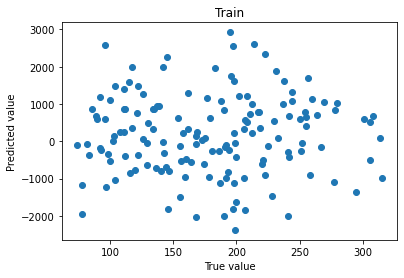

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  3.5275770592689515
MAE:  807.4516428710939
MSE:  681651.8256616945


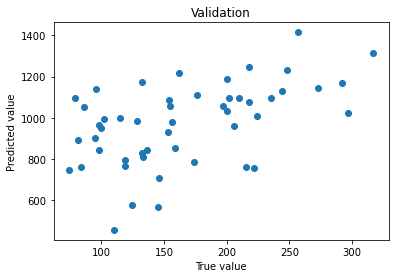

Epoch:  1
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.9168059742450714
MAE:  253.27695197753903
MSE:  114721.61906953735


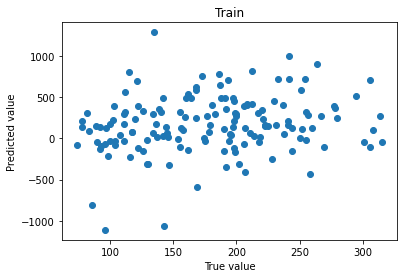

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.4983596503734589
MAE:  115.90334667968749
MSE:  21129.04366694842


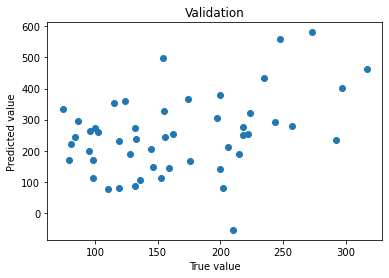

Epoch:  2
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.5377864734331768
MAE:  185.76668066507975
MSE:  55551.0961391236


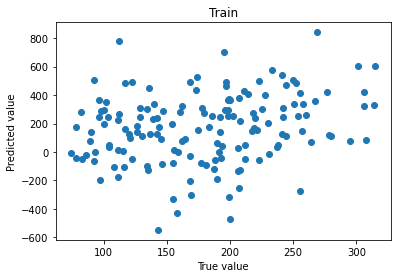

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.2688234865665435
MAE:  71.58271262207032
MSE:  8376.424650695164


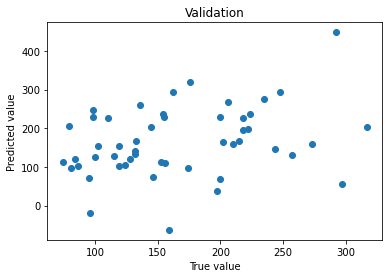

Epoch:  3
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.3199664330482483
MAE:  138.4182344543457
MSE:  29251.56394218626


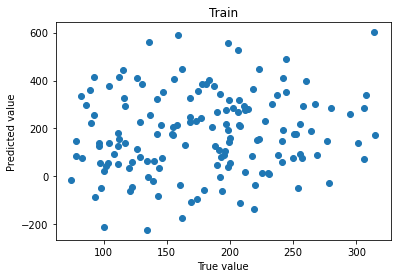

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9626558864116669
MAE:  58.10519829101563
MSE:  5224.439676406327


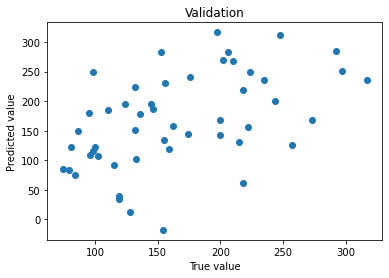

Epoch:  4
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.2373049255212147
MAE:  107.3095912841797
MSE:  17896.366243407152


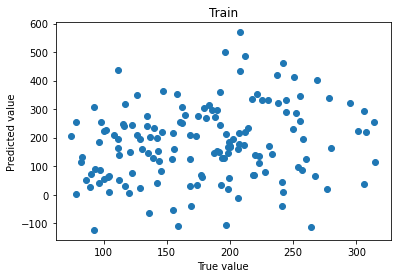

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.1719164842367171
MAE:  158.7236281738281
MSE:  30958.895284602462


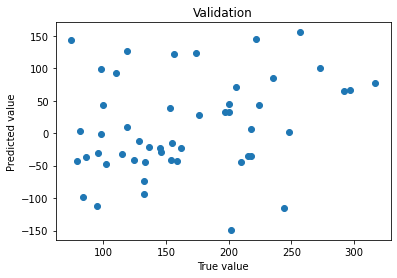

Epoch:  5
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.1368961066007615
MAE:  91.16787130126953
MSE:  12508.788708762877


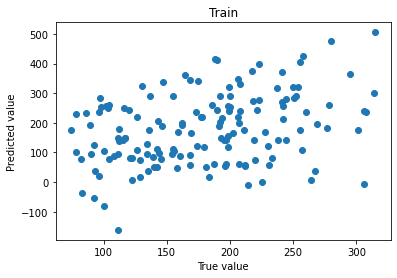

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9943351453542709
MAE:  76.8263289428711
MSE:  7602.122924646698


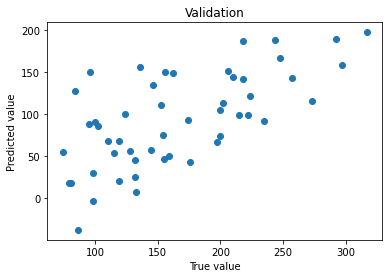

Epoch:  6
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.102977734009425
MAE:  89.72932454427084
MSE:  11590.792419193793


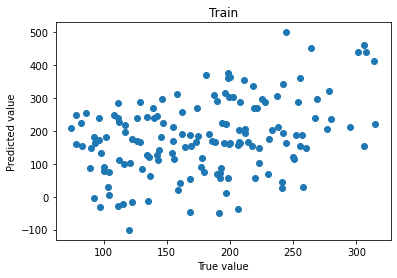

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.814026516675949
MAE:  103.82641298828126
MSE:  13376.241322652122


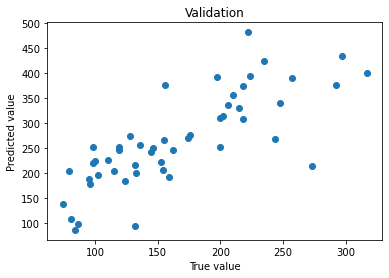

Epoch:  7
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.081054447889328
MAE:  93.96319792073568
MSE:  13276.330364187379


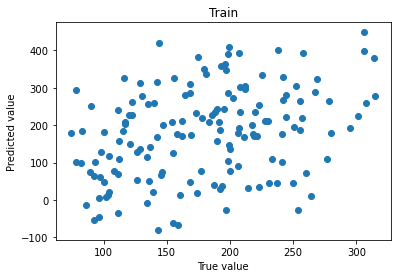

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.243183878660202
MAE:  61.313209863281244
MSE:  5292.6314579645


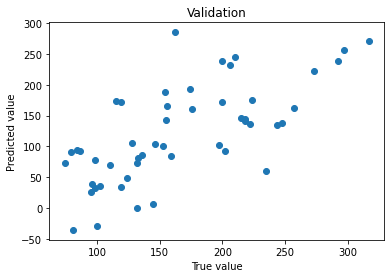

Epoch:  8
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0681429463624954
MAE:  79.95132608032227
MSE:  10071.318968390353


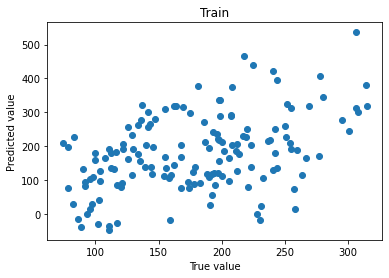

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.214645767211914
MAE:  41.42586982421875
MSE:  2828.875663545505


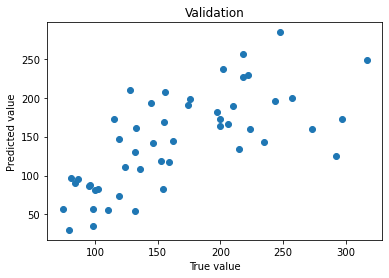

Epoch:  9
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0692098839084307
MAE:  68.9597868326823
MSE:  7503.299681108875


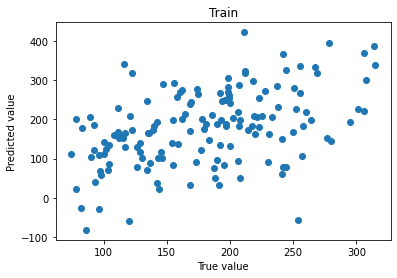

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9149842149019242
MAE:  34.81218771972656
MSE:  1834.2223163839558


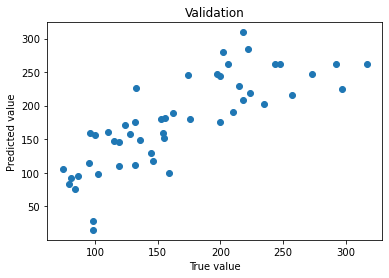

Epoch:  10
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0426167960961659
MAE:  76.31985836181639
MSE:  9905.137178460209


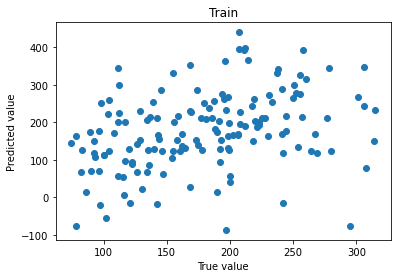

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.882137343287468
MAE:  38.55024150390626
MSE:  2074.901808318339


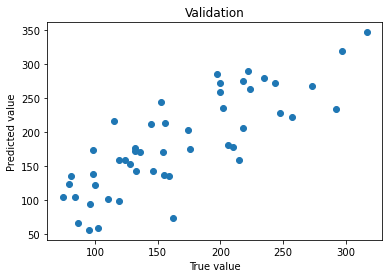

Epoch:  11
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0239341111977895
MAE:  75.38237095947265
MSE:  8957.574063633841


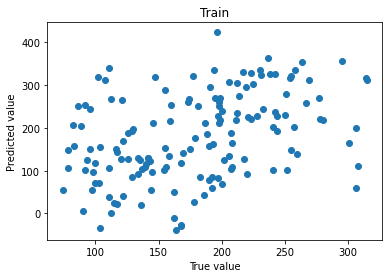

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8530737364292145
MAE:  45.517963964843744
MSE:  3227.100134253053


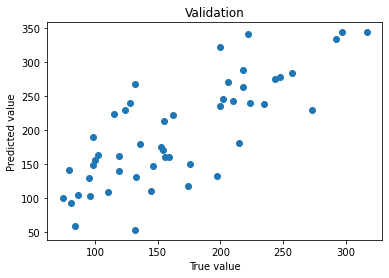

Epoch:  12
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9879180131355921
MAE:  61.421465144856775
MSE:  6046.830996160555


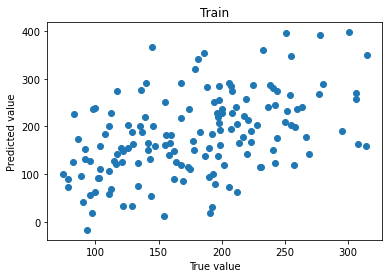

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.1419896149635316
MAE:  115.40502574462892
MSE:  15094.232650997948


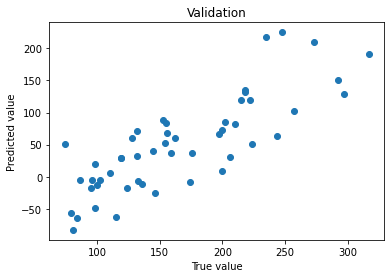

Epoch:  13
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9984053059418996
MAE:  77.70577452189127
MSE:  9113.28752292567


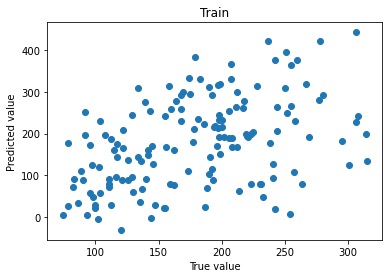

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.1034983217716217
MAE:  39.6986044921875
MSE:  2632.045659272368


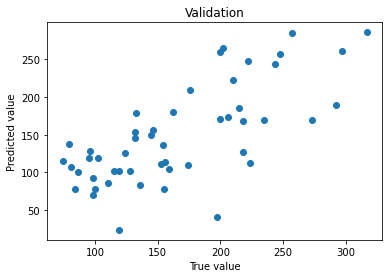

Epoch:  14
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.964800564845403
MAE:  46.373883081054686
MSE:  3226.6143036135486


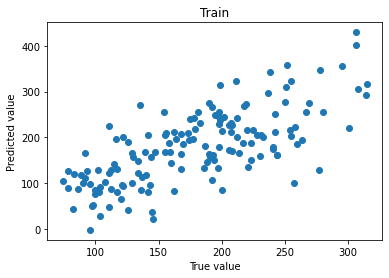

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7572634923458099
MAE:  44.13615121459961
MSE:  3008.3241917004816


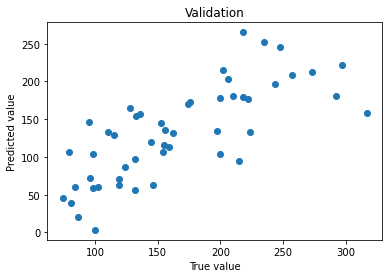

Epoch:  15
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9883822456995646
MAE:  52.34248409830729
MSE:  4499.603709457734


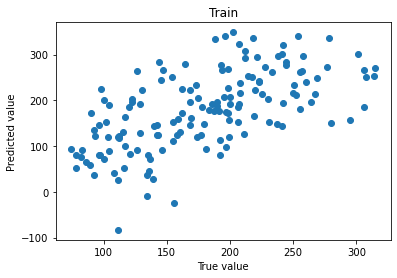

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.6718797075748444
MAE:  34.0187705078125
MSE:  1914.196673291466


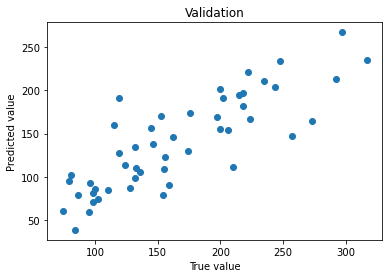

Epoch:  16
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9864150762557984
MAE:  55.45734204101563
MSE:  4754.0862061566995


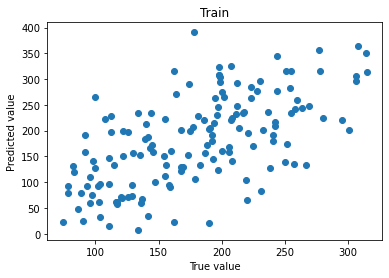

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.1049636042118072
MAE:  49.517163671875004
MSE:  3507.256715777266


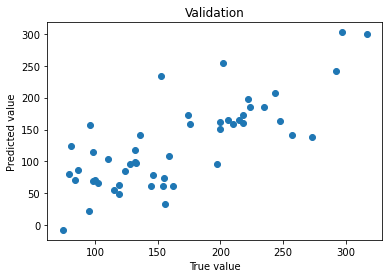

Epoch:  17
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9806251726547877
MAE:  54.54364475097656
MSE:  4336.694825959027


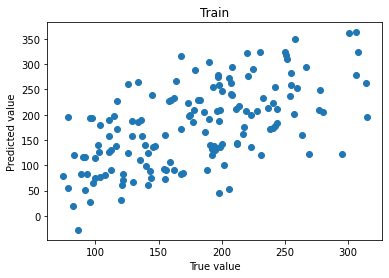

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9480331164598464
MAE:  30.308623730468753
MSE:  1537.1511319486717


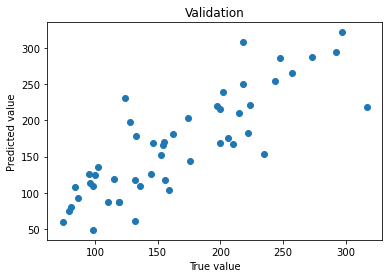

Epoch:  18
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9198947723706563
MAE:  37.39006989746094
MSE:  2463.693629488343


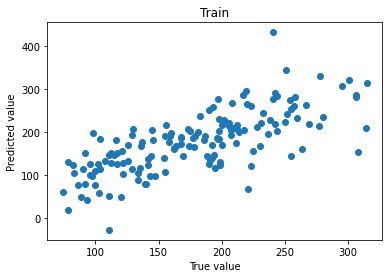

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.2198612010478973
MAE:  35.670361328125
MSE:  1983.3426181108082


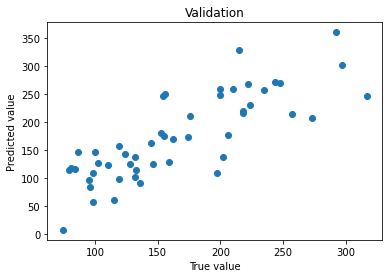

Epoch:  19
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9651981496810913
MAE:  45.49838592936198
MSE:  2962.4104160192283


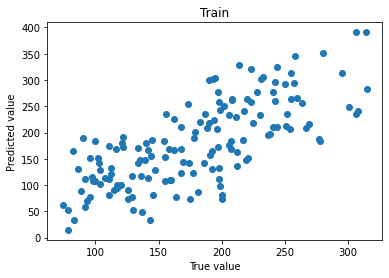

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7622711819410324
MAE:  34.190150781250004
MSE:  1913.8962369793705


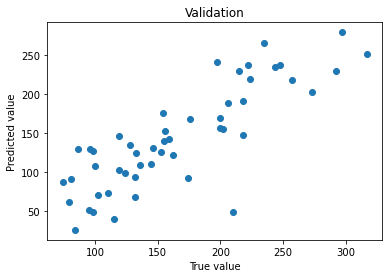

Epoch:  20
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9243381440639495
MAE:  45.32416025390625
MSE:  3215.5173504368195


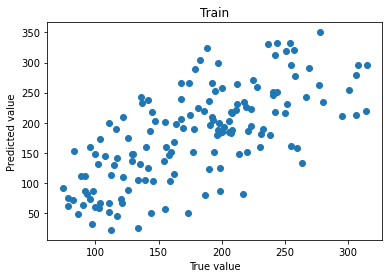

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8826324248313904
MAE:  56.601946484375006
MSE:  4205.730172198918


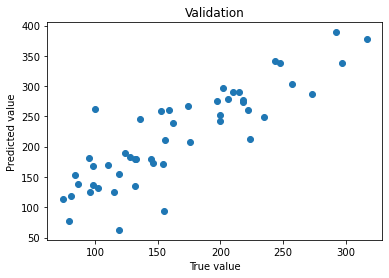

Epoch:  21
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9449154957135518
MAE:  51.24186892903646
MSE:  3948.6140295169766


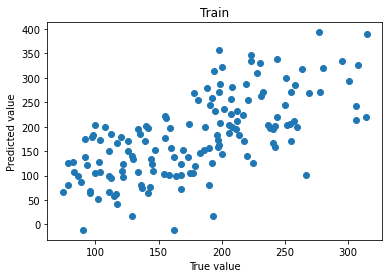

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8577875000238419
MAE:  30.908788183593742
MSE:  1512.1049895047838


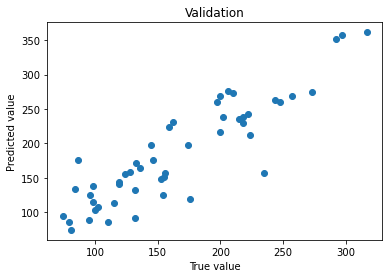

Epoch:  22
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9095386560757955
MAE:  48.92425739339193
MSE:  3602.1028888819405


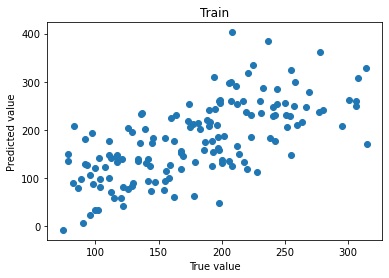

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7038129410147667
MAE:  38.12478798828125
MSE:  2120.430741105233


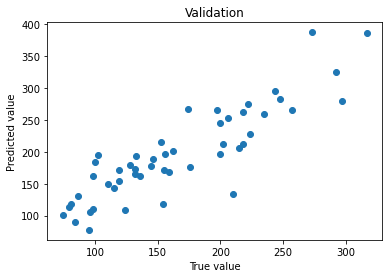

Epoch:  23
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9237213730812073
MAE:  55.0579147644043
MSE:  4618.790329211108


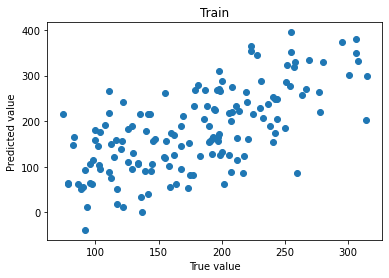

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.833521825671196
MAE:  34.23107656250001
MSE:  1952.782004726814


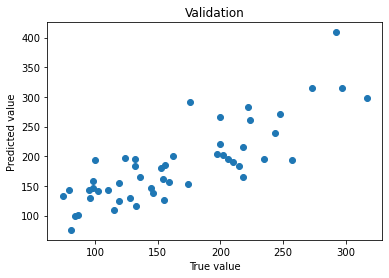

Epoch:  24
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9369657764832179
MAE:  40.98865924479166
MSE:  2735.7398670095836


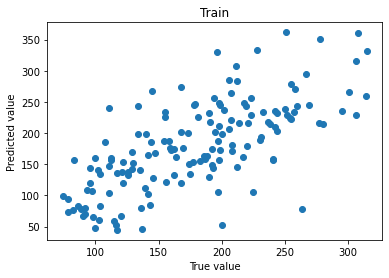

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8002104437351227
MAE:  34.680324169921874
MSE:  1807.75917801893


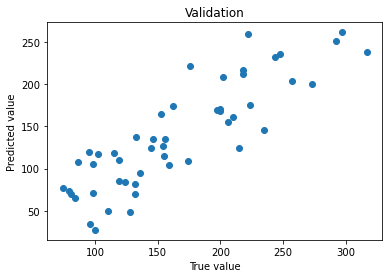

Epoch:  25
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9118224638700485
MAE:  43.18435649414063
MSE:  2885.0512592602645


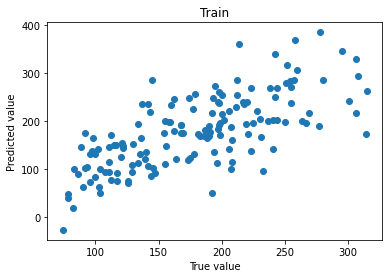

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7555343616008758
MAE:  36.30212705078125
MSE:  2072.499023835219


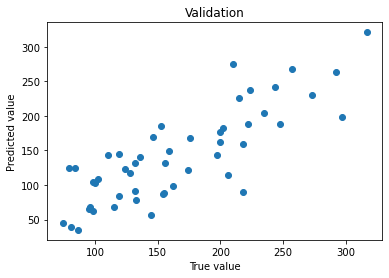

Epoch:  26
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9029062076409657
MAE:  44.73288245442708
MSE:  3048.69098344826


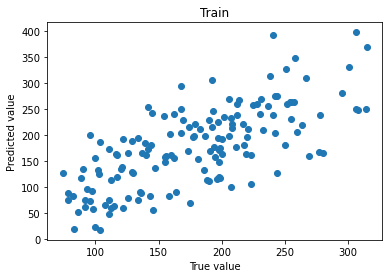

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8256629890203476
MAE:  29.288960595703124
MSE:  1433.4776180707088


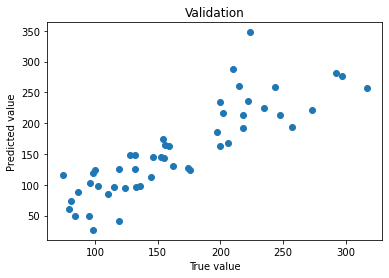

Epoch:  27
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8968075195948283
MAE:  35.296397623697914
MSE:  1993.9384861597007


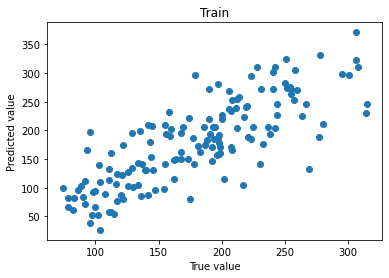

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.837647779583931
MAE:  30.1137099609375
MSE:  1252.5540796392393


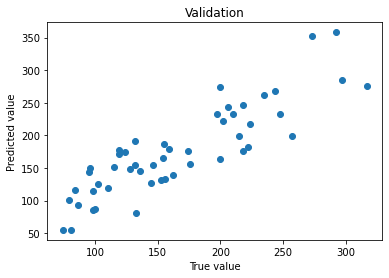

Epoch:  28
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9039988446235657
MAE:  35.994542541503904
MSE:  2160.8591730173484


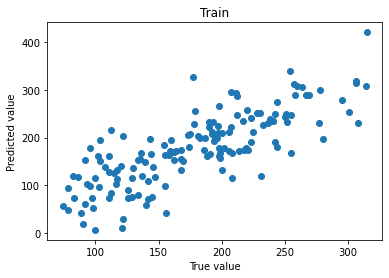

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8828960174322128
MAE:  37.89076545410156
MSE:  1932.5039185469964


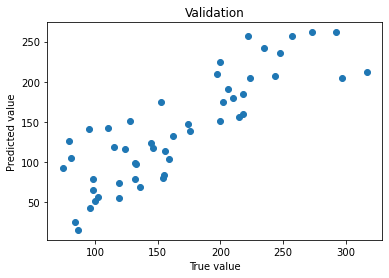

Epoch:  29
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8851797076066336
MAE:  40.45200729166667
MSE:  2329.6483858289967


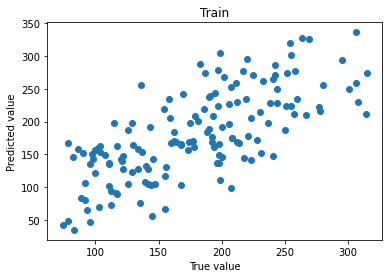

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7170679080486297
MAE:  33.156969287109376
MSE:  1645.991875435584


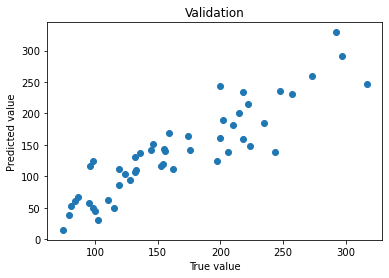

Epoch:  30
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8860768222808838
MAE:  40.21267075195312
MSE:  2503.119460055915


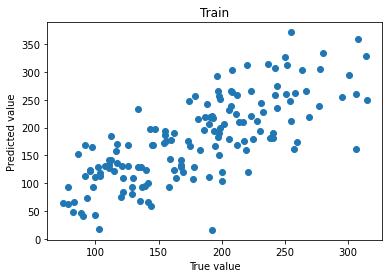

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8510994529724121
MAE:  65.91847177734375
MSE:  5303.5817104603875


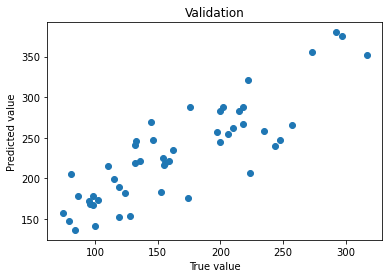

Epoch:  31
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8681605887413025
MAE:  33.360734431966144
MSE:  1699.4417714097262


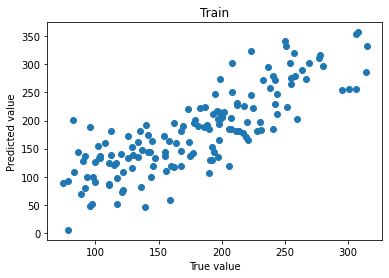

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.763082023859024
MAE:  31.569165332031254
MSE:  1466.081500976782


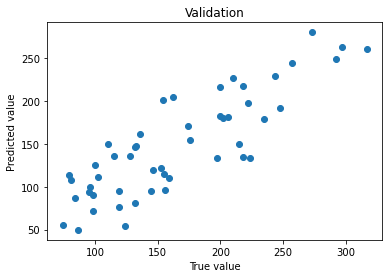

Epoch:  32
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8659266879161199
MAE:  31.368758642578122
MSE:  1554.4883180846446


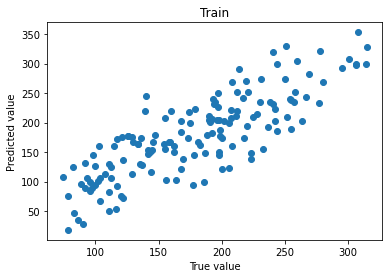

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7548452532291412
MAE:  32.319313037109374
MSE:  1751.9456462721726


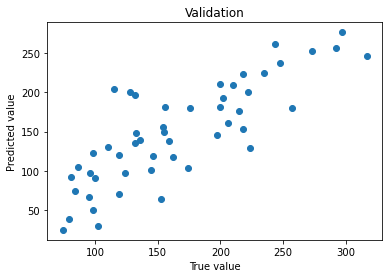

Epoch:  33
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8627024453878402
MAE:  35.17396279296875
MSE:  1987.247319046197


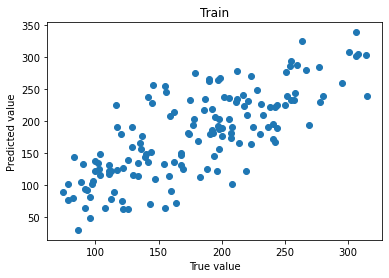

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9656950032711029
MAE:  27.024245068359374
MSE:  1262.613583768765


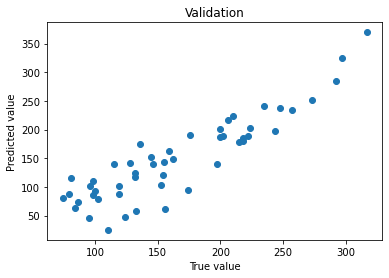

Epoch:  34
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8555351843436559
MAE:  28.676438118489582
MSE:  1307.2214200276524


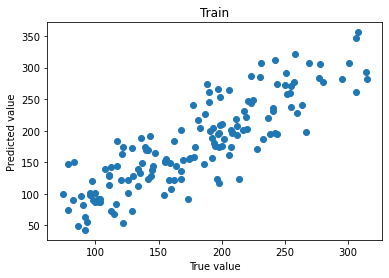

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7780000340938568
MAE:  28.84198369140625
MSE:  1239.3139249752492


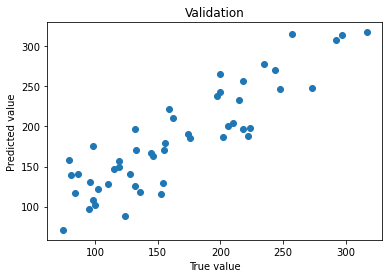

Epoch:  35
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8622613153855005
MAE:  32.74111041666667
MSE:  1612.9474951797035


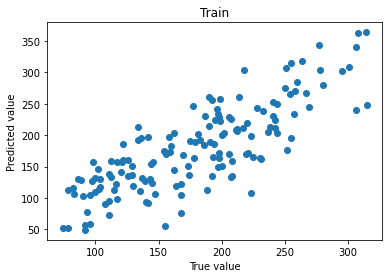

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8046234440803528
MAE:  23.752497900390622
MSE:  797.7214581749048


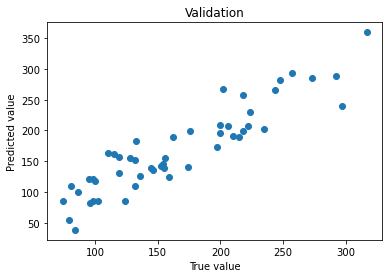

Epoch:  36
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8535579536358515
MAE:  28.788860026041668
MSE:  1204.0891856053195


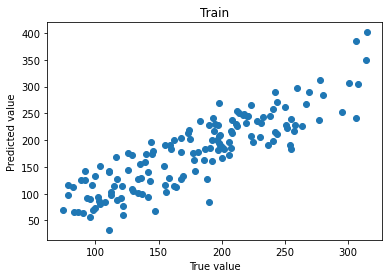

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.6621773344278336
MAE:  29.828101318359376
MSE:  1295.7725065657087


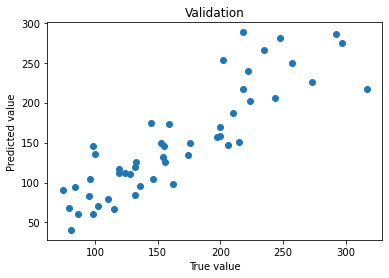

Epoch:  37
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8443100607395172
MAE:  29.303807893880208
MSE:  1355.584405102776


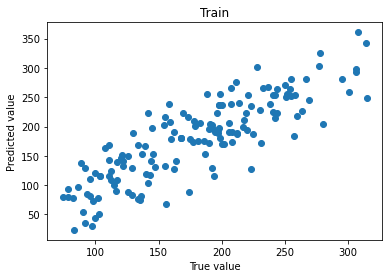

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8461747843027115
MAE:  30.32416416015625
MSE:  1331.5905592295196


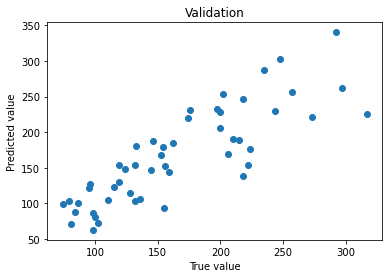

Epoch:  38
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8490847251812617
MAE:  29.1673353515625
MSE:  1416.2470485256542


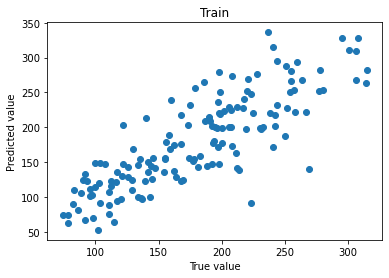

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7227731591463089
MAE:  28.5555205078125
MSE:  1251.5929303036062


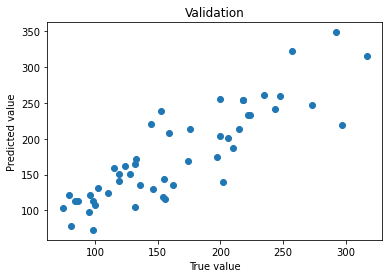

Epoch:  39
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8281363215049108
MAE:  26.874839453125
MSE:  1231.8987379250439


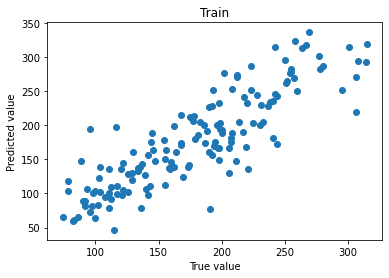

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.6665815246105194
MAE:  23.6779255859375
MSE:  998.435051390029


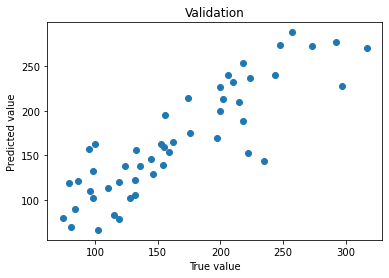

Epoch:  40
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8336932200193405
MAE:  27.429941634114584
MSE:  1165.766251446755


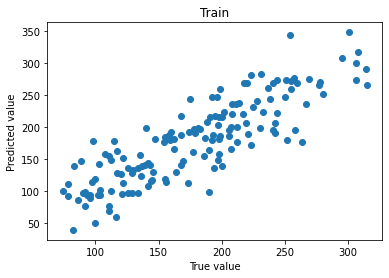

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9863123553991318
MAE:  31.813966015625002
MSE:  1573.583513929964


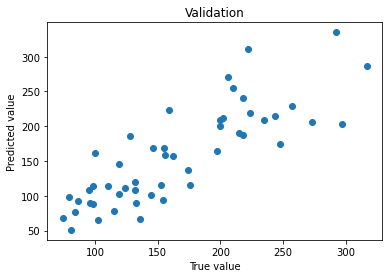

Epoch:  41
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8245776957273483
MAE:  27.8602475423177
MSE:  1248.9552024900731


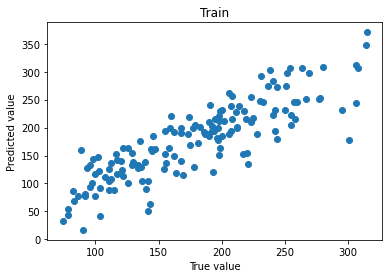

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9362006521224976
MAE:  27.808643994140624
MSE:  1155.8561447359311


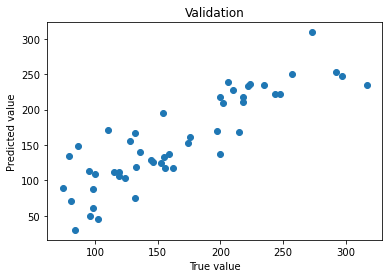

Epoch:  42
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8193061923980713
MAE:  27.227318391927085
MSE:  1154.3758068336354


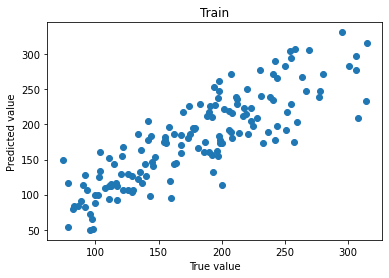

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.738338069319725
MAE:  29.259943359374994
MSE:  1384.2792074867402


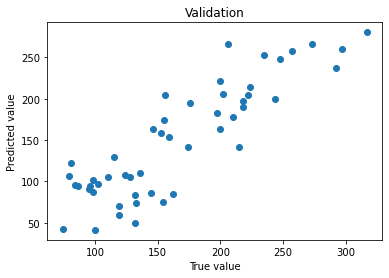

Epoch:  43
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8174803239107132
MAE:  28.239608105468747
MSE:  1267.8681951474146


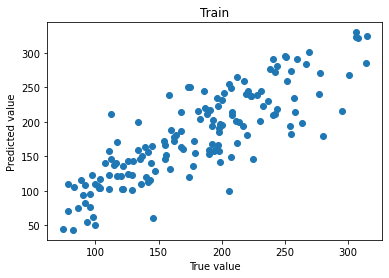

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.6636552929878234
MAE:  28.97221962890625
MSE:  1384.3257945573716


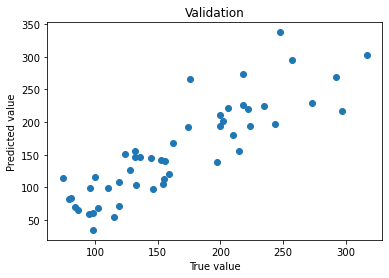

Epoch:  44
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8221137464046478
MAE:  26.392388183593752
MSE:  1124.241589130075


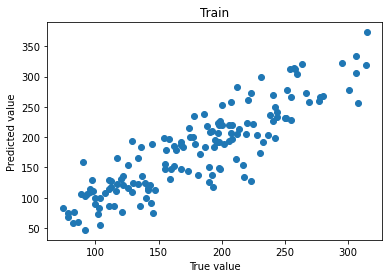

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8199904823303222
MAE:  26.79801904296875
MSE:  1217.046047281403


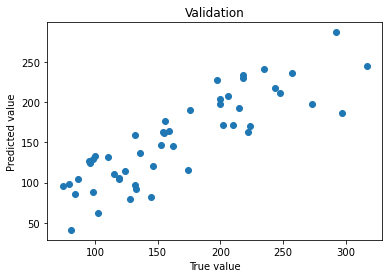

Epoch:  45
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8107362999518712
MAE:  26.603253645833338
MSE:  1171.8577301867979


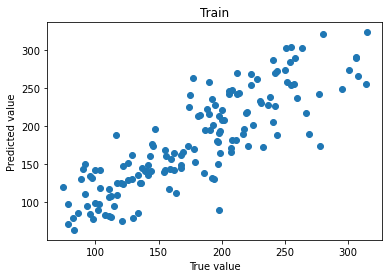

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8440734511613845
MAE:  27.868765234374997
MSE:  1233.110417026298


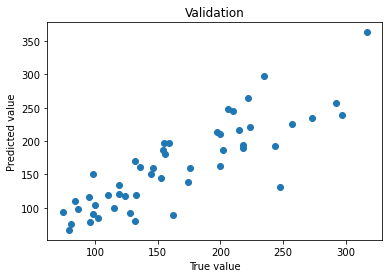

Epoch:  46
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8080548365910848
MAE:  24.64727161458333
MSE:  947.1045160447837


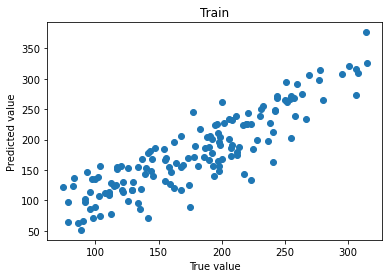

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8168337780237198
MAE:  27.046816748046872
MSE:  1203.3525732333976


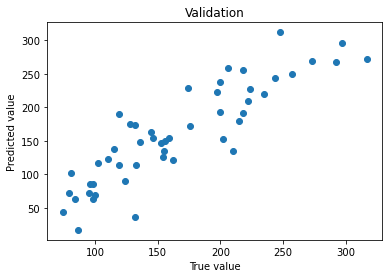

Epoch:  47
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8078914884726206
MAE:  30.6672048828125
MSE:  1413.159755792621


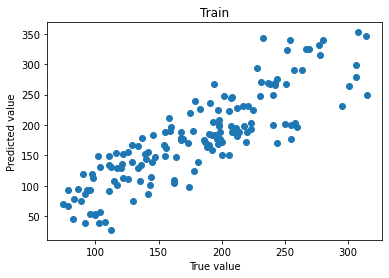

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7923551493883133
MAE:  24.348506250000003
MSE:  856.3426007795592


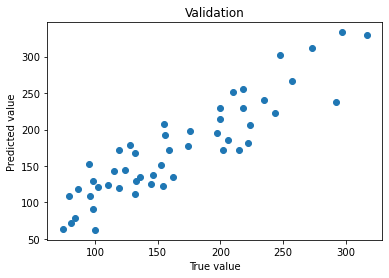

Epoch:  48
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.803647383650144
MAE:  29.230487369791664
MSE:  1390.1786228731469


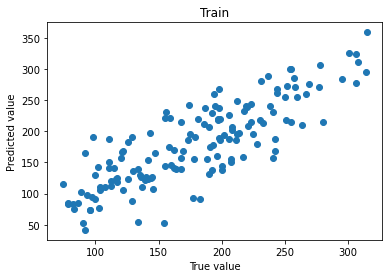

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7900405406951905
MAE:  25.10747109375
MSE:  1067.485629528411


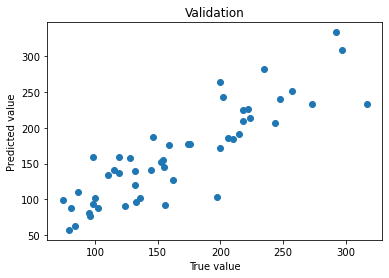

Epoch:  49
Training: 


<ipython-input-3-faafafbcf9da>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8049551262458166
MAE:  27.846947009277343
MSE:  1219.3650993317528


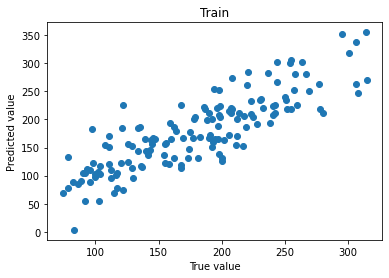

Validation: 


<ipython-input-3-faafafbcf9da>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-3-faafafbcf9da>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7909582149982453
MAE:  24.920734765625003
MSE:  1072.07666442489


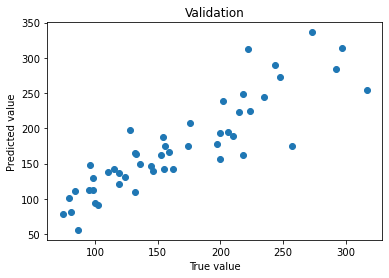

In [5]:
from base import data_loader
from base import train
from torch.autograd import Variable


data_loader = train.get_loader('cell', batch_size=1, horizontal_flip = 0.5, vertical_flip = 0.5)

train_queue = data_loader['train']
valid_queue = data_loader['valid']
model = model.cuda()

epochs = 50

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, float(epochs))

for epoch in range(epochs):
    
    print("Epoch: ", epoch)
    
    train_model(train_queue, model, criterion, optimizer)
    validate_model(valid_queue, model, criterion)
    
    scheduler.step()

In [7]:
import pickle

genotype = model.genotype()

with open("genotype.pkl", 'wb') as f:
    pickle.dump(genotype, f)

del model
torch.cuda.empty_cache()

# Training NasUNet from Genotype

In [23]:
def train_nas(train_queue, model_nas, criterion_nas, optimizer):
    print("Training: ")
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(train_queue):

        model_nas.train()

        image = image.cuda()
        label = label.cuda()

        optimizer.zero_grad()

        logits = model_nas(image)
                
        if isinstance(logits, list):
            loss = criterion_nas(logits[0], label)
        else:
            loss = criterion_nas(logits, label)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)
        optimizer.step()
        loss_vals.append(loss.item())

        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)

    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Train")



def validate_nas(valid_queue, model_nas, criterion_nas):
    
    print("Validation: ")
    
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(valid_queue):
        image = Variable(image, volatile=True).cuda()
        label = Variable(label, volatile=True).cuda()
        
        logits = model_nas(image)
            
        if isinstance(logits, list):
            loss = criterion_nas(logits[0], label)
        else:
            loss = criterion_nas(logits, label)
        
        loss_vals.append(loss.item())
        
        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)
        
    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Validation")

In [24]:
from lbt.models import nas_unet

criterion_nas = torch.nn.MSELoss()
criterion_nas = criterion_nas.cuda()

model_nas = nas_unet.NasUnet(1, 3, aux = False, genotype = genotype)
model_nas = model_nas.cuda()

optimizer_nas = torch.optim.SGD(
      model_nas.parameters(),
      0.025,
      momentum=0.9,
      weight_decay=3e-4)

This model does not need pretrained backbone


Epoch:  0
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.7856120363871257
MAE:  141.24813752441406
MSE:  34511.663691218295


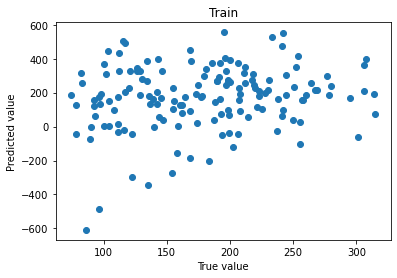

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.3770507764816284
MAE:  65.69371630859376
MSE:  4772.350124573489


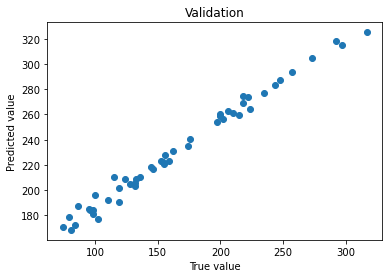

Epoch:  1
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.276465989947319
MAE:  39.04126533203125
MSE:  2533.97358855709


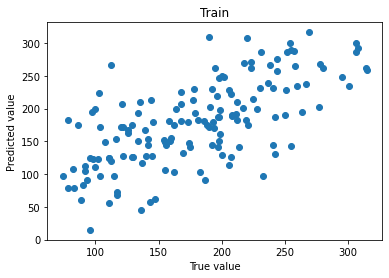

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0566466677188873
MAE:  13.653757910156251
MSE:  267.82914051930095


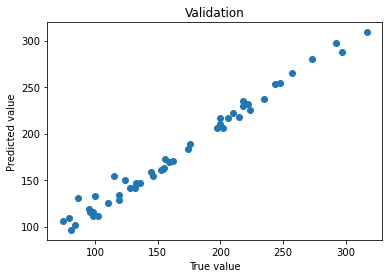

Epoch:  2
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.1759560384353003
MAE:  24.418390820312496
MSE:  910.4793869345028


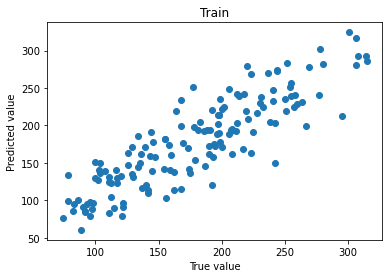

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9297967457771301
MAE:  59.48711435546875
MSE:  3571.7105693497024


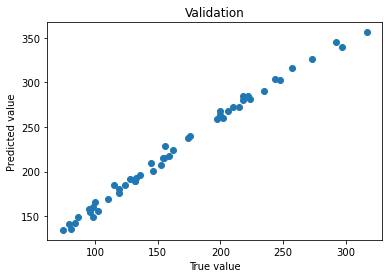

Epoch:  3
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.1311026271184286
MAE:  21.96142041015625
MSE:  744.742402736313


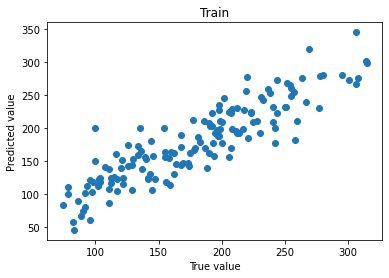

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0154546904563904
MAE:  10.393260839843752
MSE:  131.87623815401315


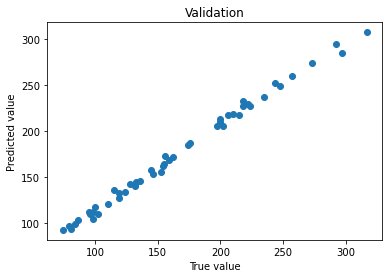

Epoch:  4
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.1033990786472956
MAE:  18.027177994791668
MSE:  537.5993533271202


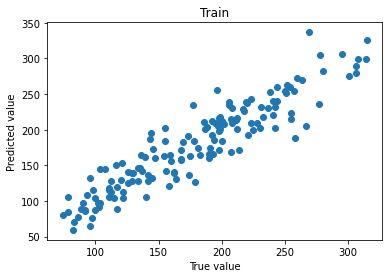

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.2094269263744355
MAE:  8.075564941406249
MSE:  91.65792489381457


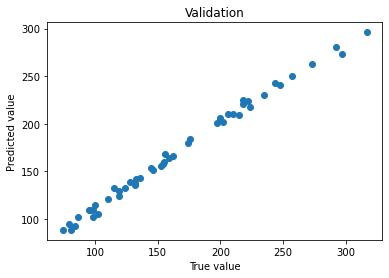

Epoch:  5
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.0685260150829952
MAE:  16.767779264322918
MSE:  431.2475010959942


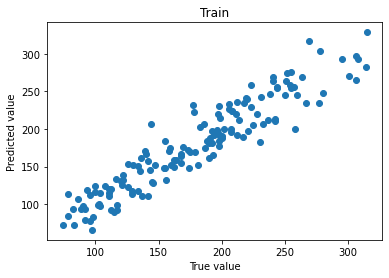

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0699921107292176
MAE:  5.4932759765625
MSE:  62.201815724557875


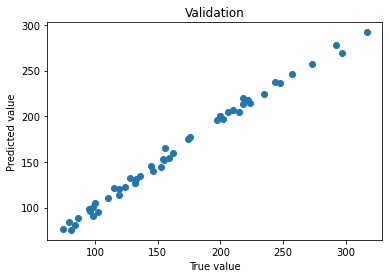

Epoch:  6
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.064600065747897
MAE:  15.05189833984375
MSE:  378.63423526223926


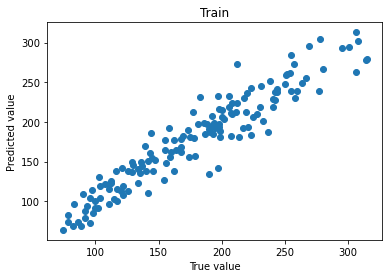

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8881980872154236
MAE:  29.260731347656247
MSE:  905.4501477933507


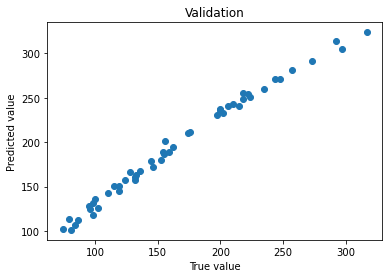

Epoch:  7
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.037724099556605
MAE:  16.419489876302084
MSE:  450.72114803486147


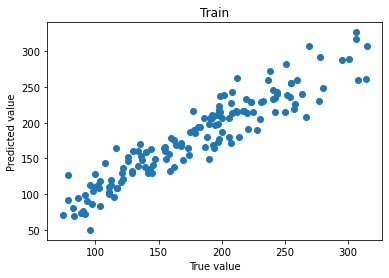

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0991534608602525
MAE:  5.073212109374997
MSE:  39.247469484997715


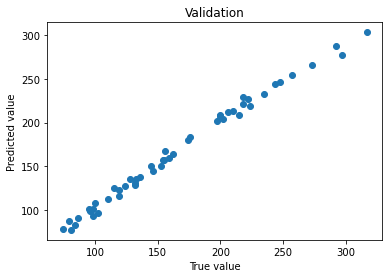

Epoch:  8
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.040166623989741
MAE:  15.869520279947917
MSE:  409.07078038422026


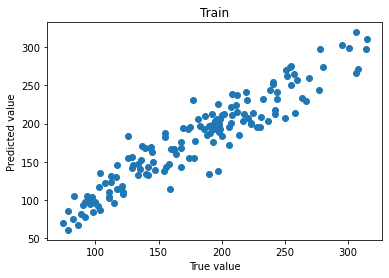

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8779806596040726
MAE:  38.53601865234375
MSE:  1534.7652475781774


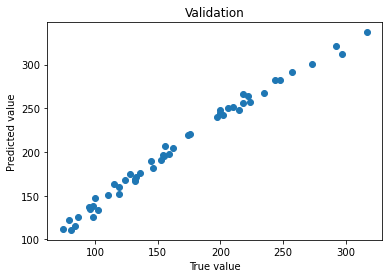

Epoch:  9
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.042352931300799
MAE:  14.934564941406245
MSE:  349.55993012392696


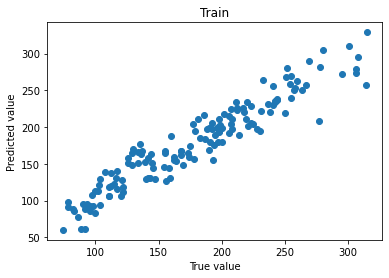

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7772988021373749
MAE:  6.5976638671875
MSE:  87.41741542911718


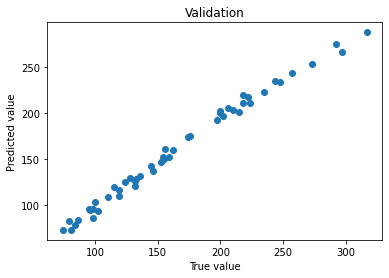

Epoch:  10
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.0291491119066873
MAE:  15.616789811197917
MSE:  387.9769416091174


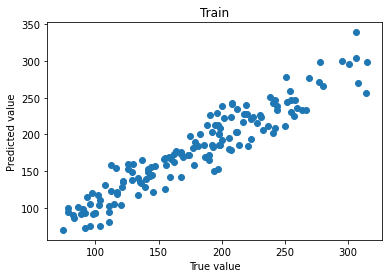

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8589597016572952
MAE:  12.293027832031248
MSE:  193.46783598358581


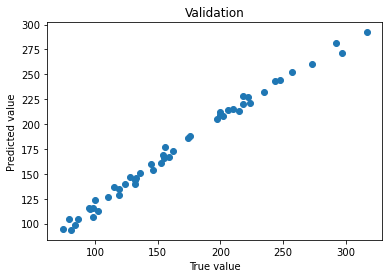

Epoch:  11
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.0155458005269369
MAE:  17.354650781249997
MSE:  461.56585125514346


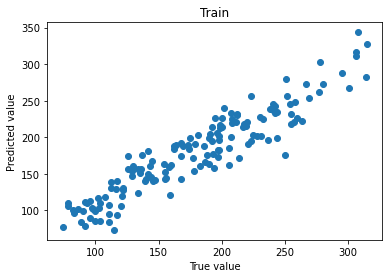

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9114358925819397
MAE:  6.611200683593748
MSE:  65.35501132786987


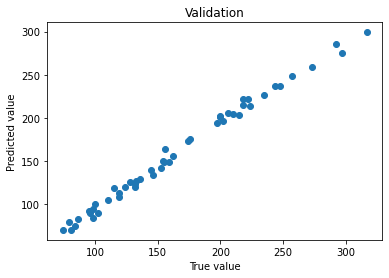

Epoch:  12
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.0196718307336172
MAE:  17.138738216145832
MSE:  444.3711044801095


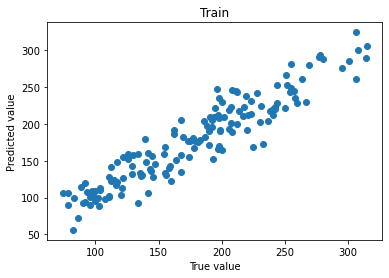

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.74356400847435
MAE:  14.30836279296875
MSE:  233.64158530728383


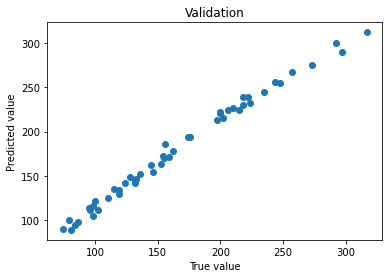

Epoch:  13
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  1.0009036348263423
MAE:  13.157185904947916
MSE:  283.5751117392415


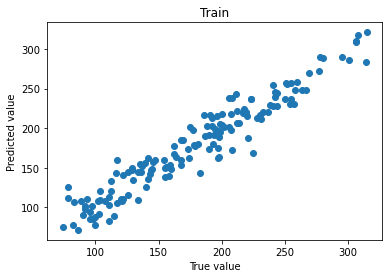

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8197926276922226
MAE:  19.022065917968753
MSE:  401.26050061547323


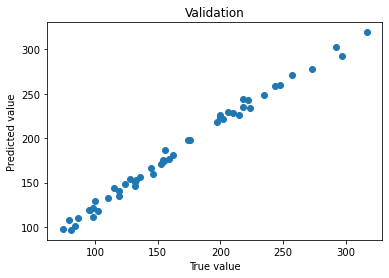

Epoch:  14
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9909467166662216
MAE:  13.604746354166666
MSE:  276.23575333388266


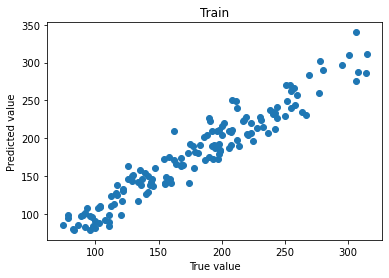

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0126285684108733
MAE:  11.449527832031249
MSE:  159.99333969785164


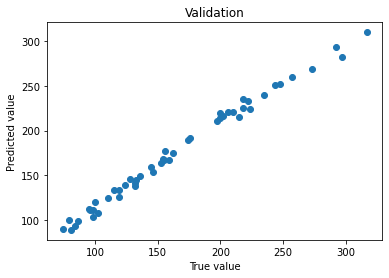

Epoch:  15
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.995746459364891
MAE:  13.612697819010416
MSE:  294.0794833279828


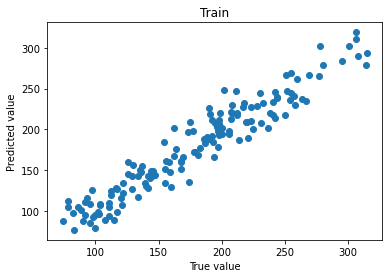

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.096063586473465
MAE:  12.11569052734375
MSE:  172.8285538976521


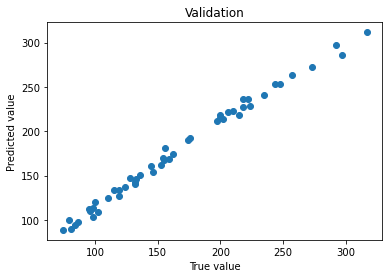

Epoch:  16
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9918290170033773
MAE:  14.34137138671875
MSE:  354.6127486923499


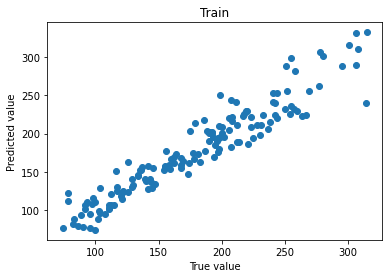

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8936557537317276
MAE:  28.13111943359375
MSE:  832.6295326896311


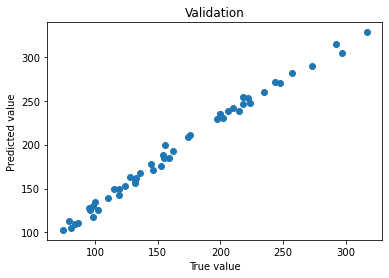

Epoch:  17
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9852221111456553
MAE:  14.667319498697912
MSE:  355.10666810419536


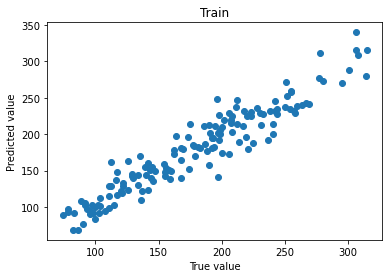

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9245443761348724
MAE:  7.49768115234375
MSE:  76.49492881359339


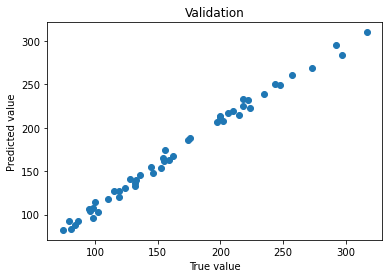

Epoch:  18
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9757449920972189
MAE:  14.78709013671875
MSE:  344.49967225545254


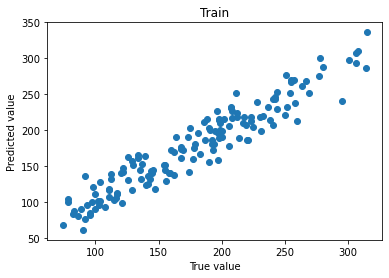

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8923699569702148
MAE:  36.24093427734375
MSE:  1350.8053868296647


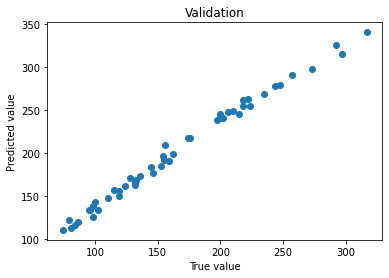

Epoch:  19
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9754106378555298
MAE:  15.830379069010421
MSE:  447.8311234280041


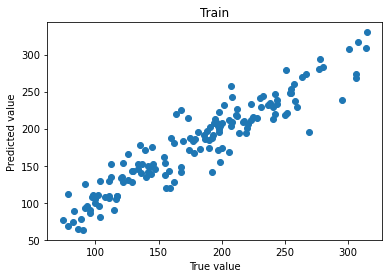

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0492611992359162
MAE:  19.012322753906254
MSE:  393.4886236301217


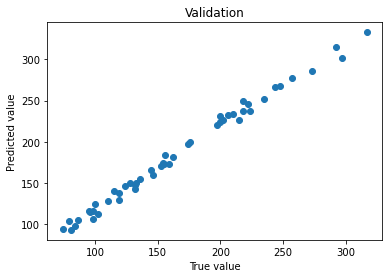

Epoch:  20
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9765515913565953
MAE:  14.99089453125
MSE:  349.34055038213603


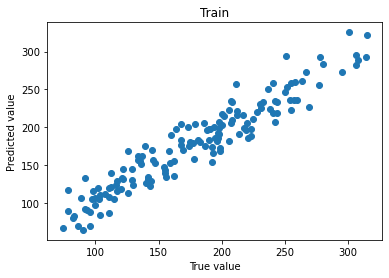

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.6747102165222167
MAE:  18.76742353515625
MSE:  393.8036314628339


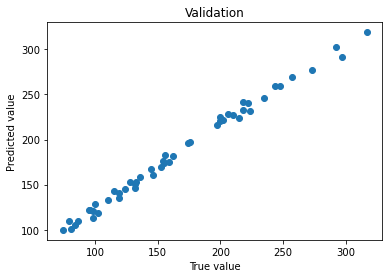

Epoch:  21
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9663267376025518
MAE:  14.36481474609375
MSE:  322.09034516645704


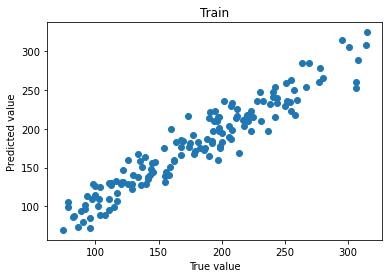

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7912631720304489
MAE:  28.89220908203125
MSE:  888.1490314255451


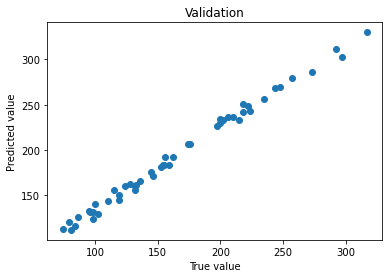

Epoch:  22
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9849279326200485
MAE:  15.7104775390625
MSE:  361.1266750396658


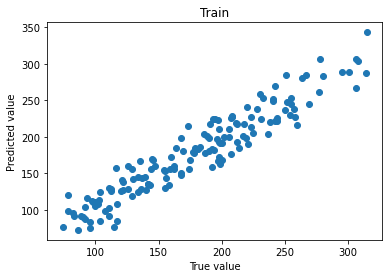

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7584089195728302
MAE:  18.802310058593747
MSE:  385.1357965326027


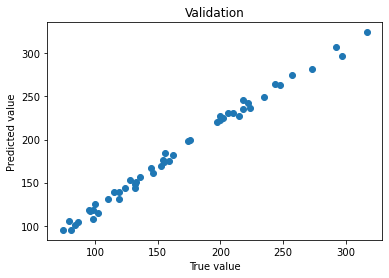

Epoch:  23
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9524319845438004
MAE:  12.824640201822916
MSE:  272.7805195296699


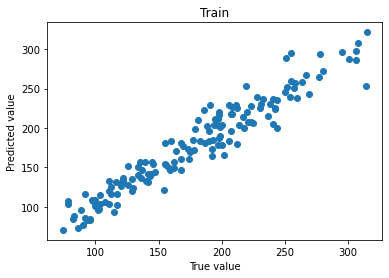

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.102763730287552
MAE:  13.207633496093749
MSE:  212.79101038666397


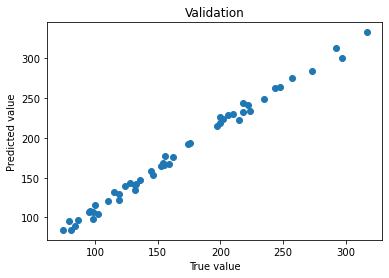

Epoch:  24
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9351596510410309
MAE:  13.264807356770834
MSE:  272.4137405172023


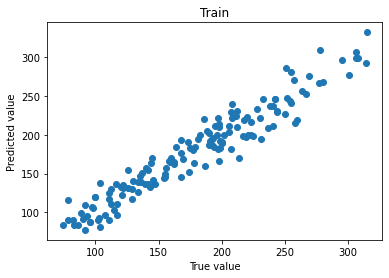

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7527940708398819
MAE:  4.565680957031248
MSE:  33.38906977403306


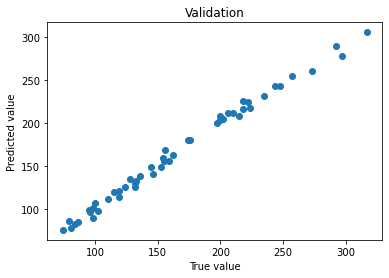

Epoch:  25
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.940959344903628
MAE:  13.185580338541667
MSE:  268.7300755903308


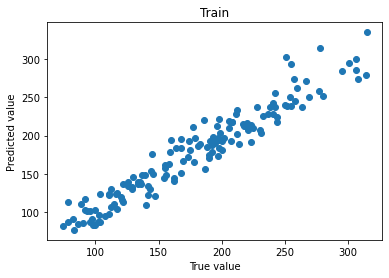

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8686466705799103
MAE:  13.977144042968748
MSE:  225.9196964408593


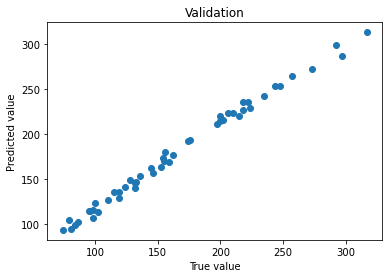

Epoch:  26
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9441693176825842
MAE:  11.572536751302083
MSE:  198.2853622961974


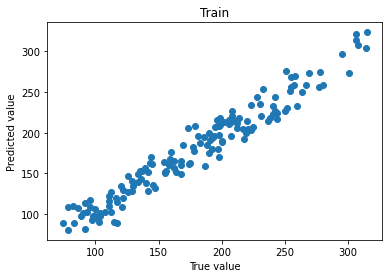

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9689578092098237
MAE:  9.460318066406247
MSE:  110.00547880412337


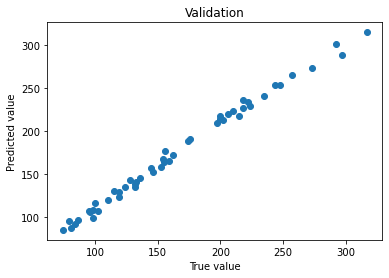

Epoch:  27
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9384697757164637
MAE:  10.92336875
MSE:  209.43612963450116


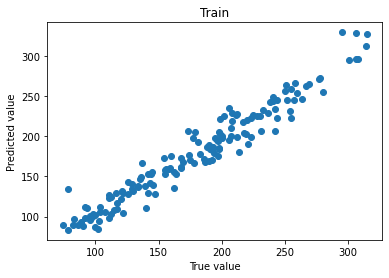

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9561871188879013
MAE:  21.91266005859375
MSE:  509.4464464801546


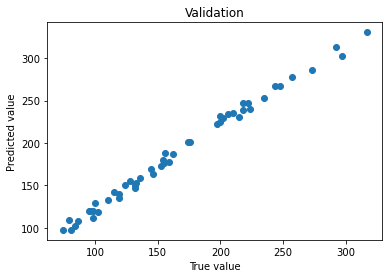

Epoch:  28
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9395271354913711
MAE:  11.976590201822917
MSE:  237.93826059629777


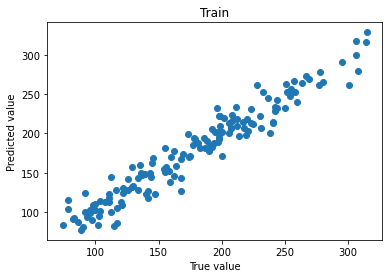

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9771755647659301
MAE:  8.91495361328125
MSE:  97.80728765033959


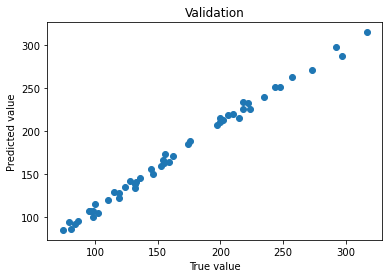

Epoch:  29
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9366088658571243
MAE:  11.752767675781252
MSE:  217.26872921776913


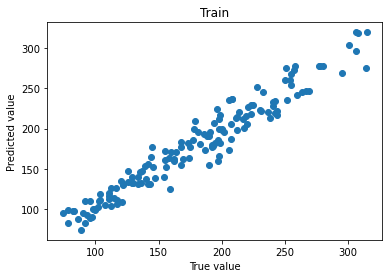

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8680039662122726
MAE:  12.10929501953125
MSE:  168.96576707706308


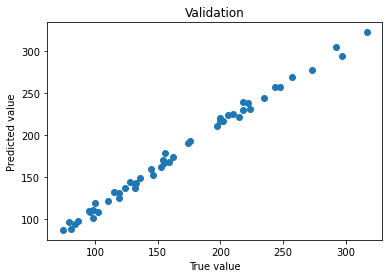

Epoch:  30
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9327748785416285
MAE:  9.66156171875
MSE:  143.6562458607839


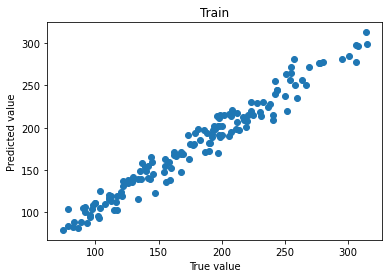

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8807880055904388
MAE:  5.311234960937497
MSE:  54.472136722082126


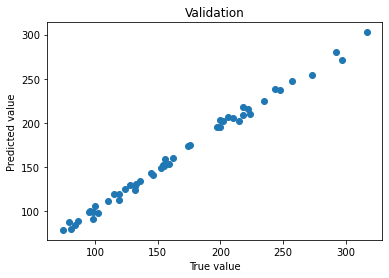

Epoch:  31
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9134592322508494
MAE:  9.694329361979165
MSE:  161.71718371239785


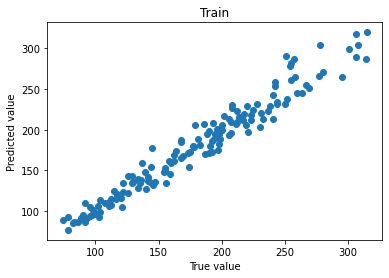

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7387955904006958
MAE:  10.76617021484375
MSE:  135.1950218741021


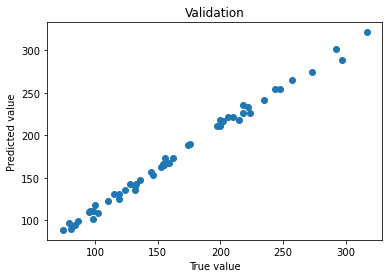

Epoch:  32
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9154701256752014
MAE:  9.981225618489583
MSE:  166.36967560087345


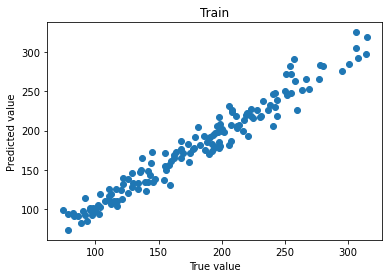

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7949500554800033
MAE:  22.86296923828125
MSE:  551.3370707011608


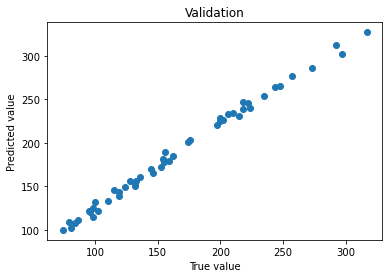

Epoch:  33
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9219837129116059
MAE:  10.719563541666666
MSE:  177.46246731884764


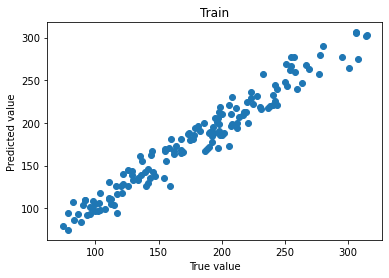

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7794828695058823
MAE:  6.77647626953125
MSE:  62.69218189204454


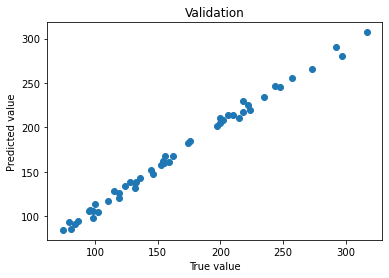

Epoch:  34
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9065014193455379
MAE:  8.981826302083334
MSE:  126.34903418501412


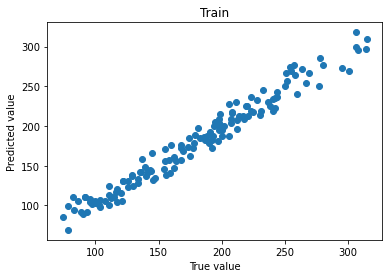

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8102996337413788
MAE:  4.401222460937499
MSE:  29.672338081003186


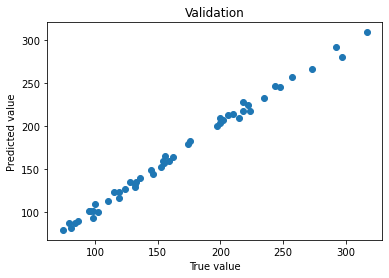

Epoch:  35
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.9199050370852152
MAE:  8.756953645833335
MSE:  117.31586034902445


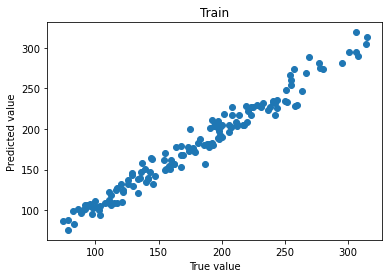

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9656031459569931
MAE:  6.221768261718751
MSE:  52.03412564832924


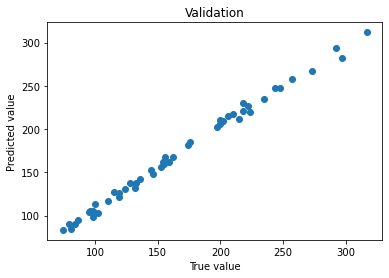

Epoch:  36
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8928306076924006
MAE:  10.282156575520833
MSE:  167.69695013668255


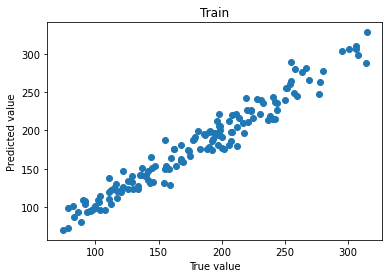

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.004358948469162
MAE:  7.321348339843751
MSE:  76.90253126661253


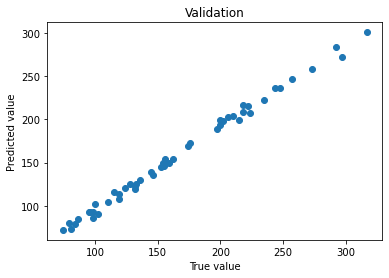

Epoch:  37
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8860154732068379
MAE:  8.747196744791667
MSE:  124.47401036548361


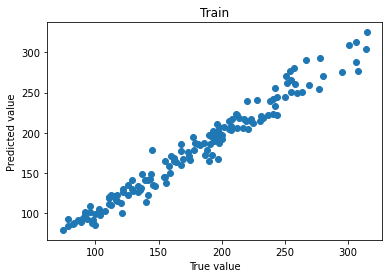

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9174785268306732
MAE:  4.403801171875
MSE:  35.40897437113956


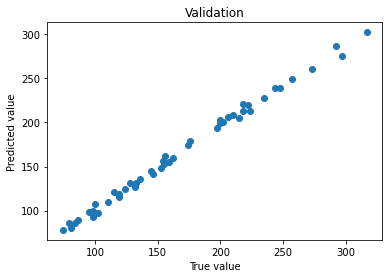

Epoch:  38
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.888327450354894
MAE:  9.227715266927083
MSE:  128.5904175421036


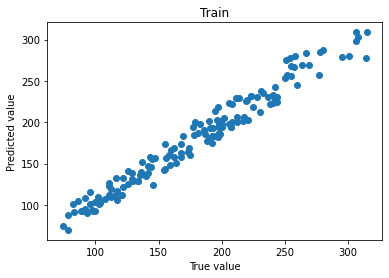

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.856501687169075
MAE:  4.82738115234375
MSE:  33.9101611647954


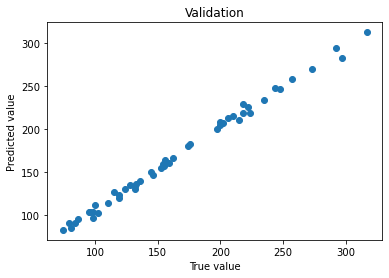

Epoch:  39
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8896228561798731
MAE:  9.129667220052083
MSE:  126.272830117592


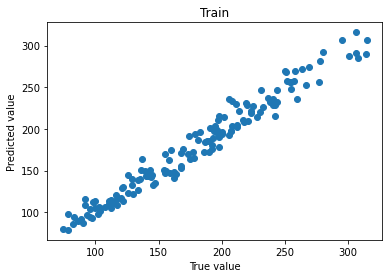

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8249597531557084
MAE:  8.96465888671875
MSE:  111.44099612384849


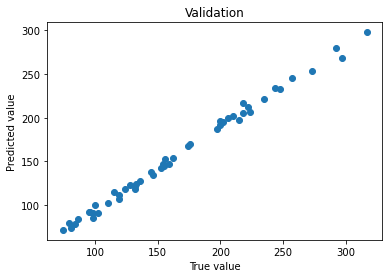

Epoch:  40
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8763401226202647
MAE:  8.992087076822918
MSE:  118.38167835837065


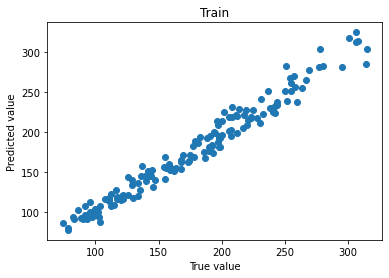

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8664013993740082
MAE:  3.5253429687499995
MSE:  20.18569514606188


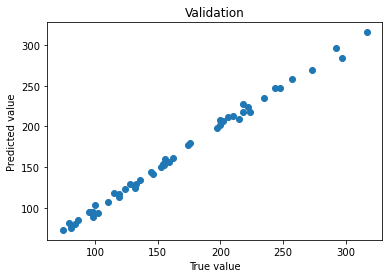

Epoch:  41
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8729852122068406
MAE:  6.7528287760416665
MSE:  72.81611893168258


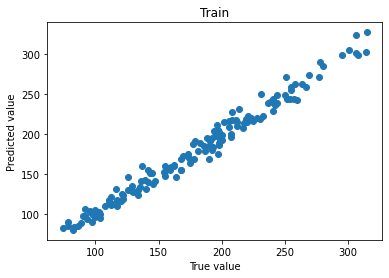

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7694246482849121
MAE:  3.7754460937499994
MSE:  25.713652425732583


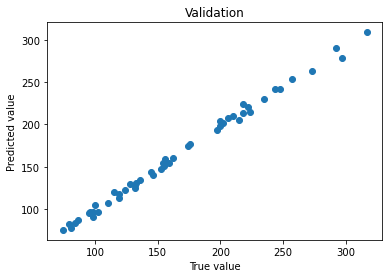

Epoch:  42
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8641581185658773
MAE:  6.642134244791669
MSE:  73.11080165322242


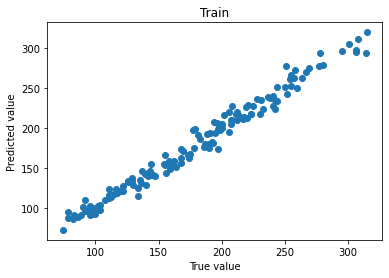

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7453283959627152
MAE:  5.799791699218751
MSE:  44.18228884388782


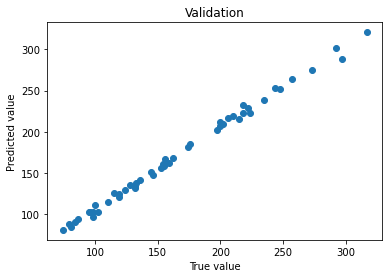

Epoch:  43
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8623373927672704
MAE:  6.9078205078125
MSE:  81.36523137252331


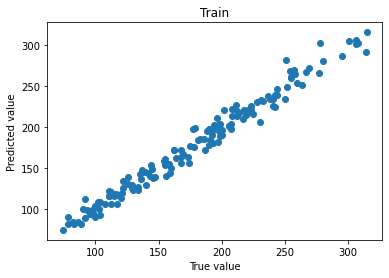

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.877466151714325
MAE:  6.397431738281248
MSE:  53.168504218801964


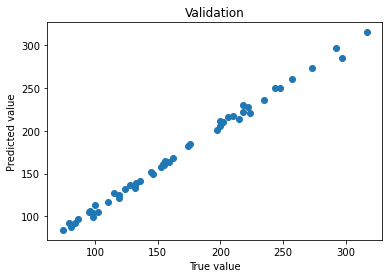

Epoch:  44
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8594605203469594
MAE:  7.358521419270835
MSE:  86.34254305756285


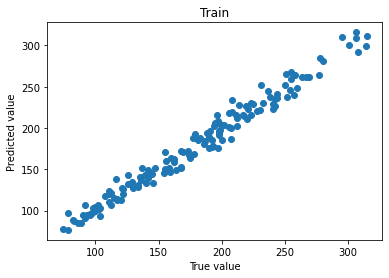

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8947161567211152
MAE:  4.4831303710937505
MSE:  38.56730082850888


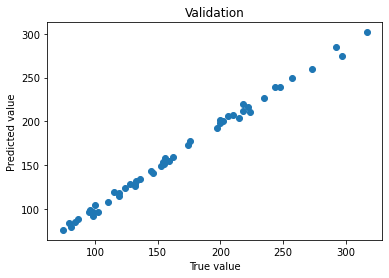

Epoch:  45
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8627651675542196
MAE:  6.952332812500001
MSE:  80.94544469080735


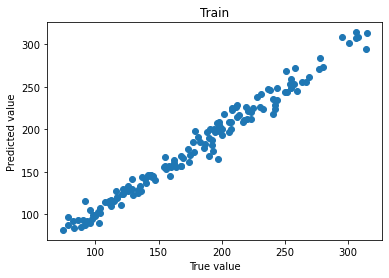

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8483343154191971
MAE:  4.438214550781251
MSE:  28.434989263290905


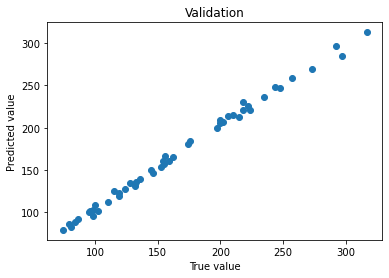

Epoch:  46
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8439277166128158
MAE:  7.378891015624999
MSE:  87.60336746700445


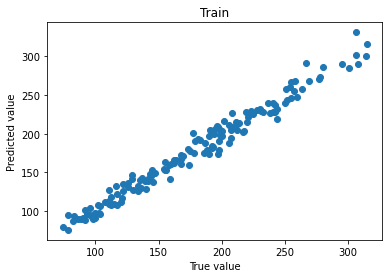

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7742399770021439
MAE:  4.562355468750001
MSE:  34.986922259083784


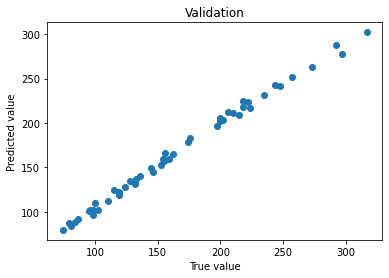

Epoch:  47
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8584852391481399
MAE:  6.207227571614582
MSE:  60.17277155912097


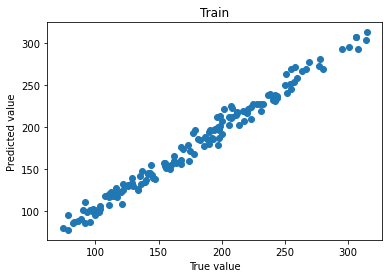

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7391962075233459
MAE:  7.008797070312499
MSE:  76.36894848190117


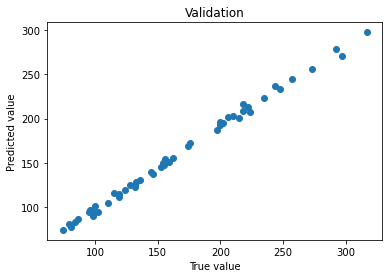

Epoch:  48
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8409937719504038
MAE:  7.314529817708335
MSE:  86.38509314279686


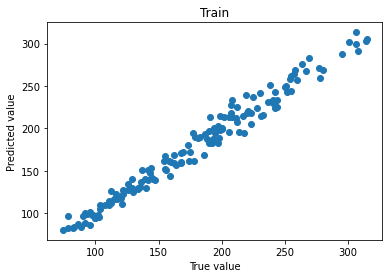

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9404870504140854
MAE:  4.8093275390625
MSE:  41.873260400389675


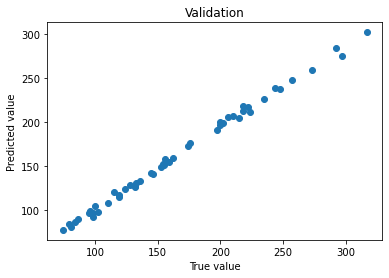

Epoch:  49
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8176672450701395
MAE:  6.836855631510416
MSE:  72.28741963904397


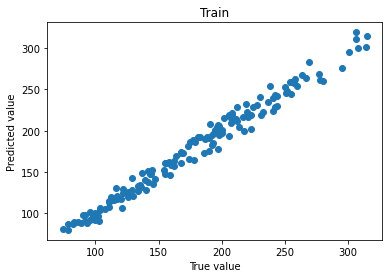

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.929906353354454
MAE:  3.5176137695312484
MSE:  19.496927941570743


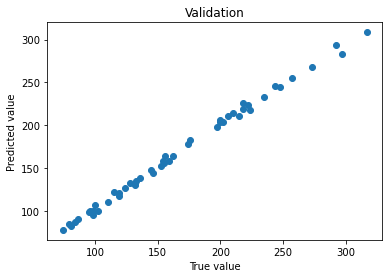

Epoch:  50
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8120342385768891
MAE:  7.1688537109374995
MSE:  81.22307775567437


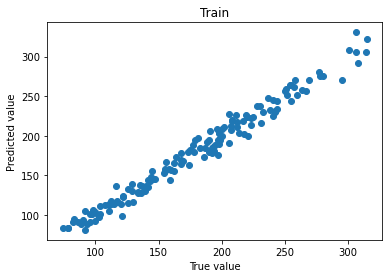

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7756679433584214
MAE:  5.5021663085937496
MSE:  56.259724310791455


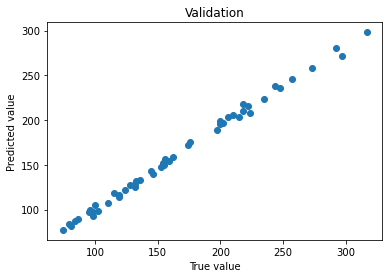

Epoch:  51
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8070405426621438
MAE:  6.071438476562499
MSE:  53.90059218117587


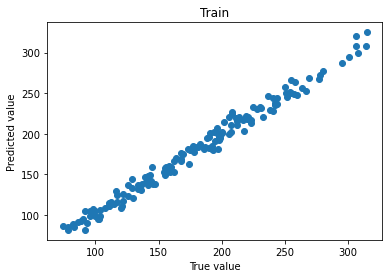

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8335686564445496
MAE:  5.80432353515625
MSE:  58.25998482582142


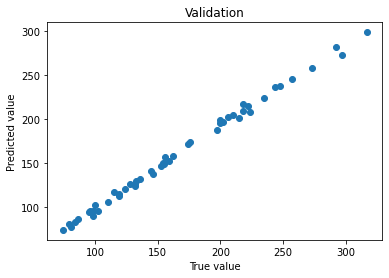

Epoch:  52
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.8054215341806412
MAE:  6.8777373046875
MSE:  72.57524664380455


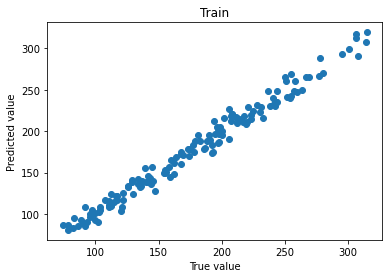

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8300473165512084
MAE:  8.50621552734375
MSE:  112.65914392416433


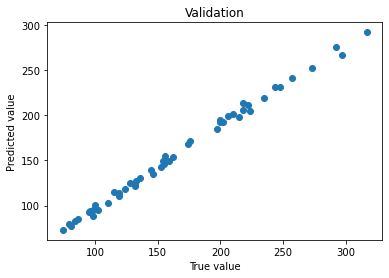

Epoch:  53
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.7936426417032878
MAE:  5.694608365885418
MSE:  48.67312368076407


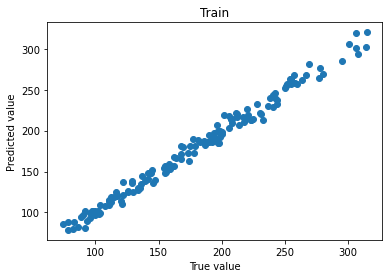

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8137807232141495
MAE:  6.359505566406247
MSE:  70.7257098201794


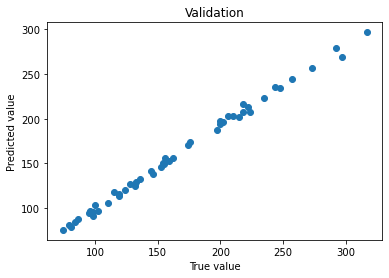

Epoch:  54
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.7909020221233368
MAE:  5.8493562500000005
MSE:  52.78283279532751


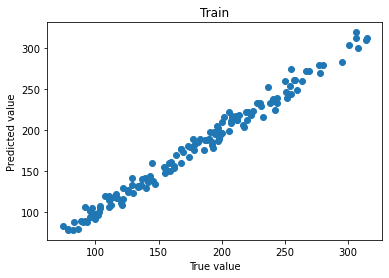

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7537784063816071
MAE:  3.5256928710937463
MSE:  23.527586408300834


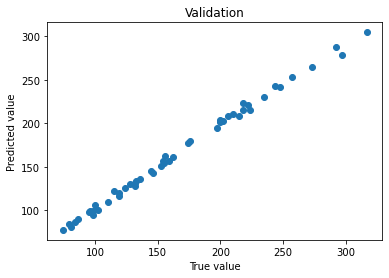

Epoch:  55
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.7705818925301234
MAE:  5.298801660156251
MSE:  41.54508324856902


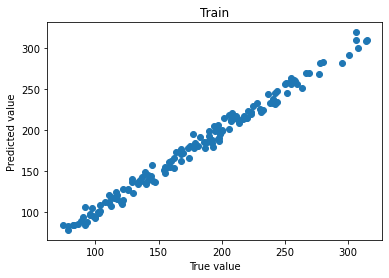

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7892316818237305
MAE:  3.747668847656252
MSE:  25.803957827909986


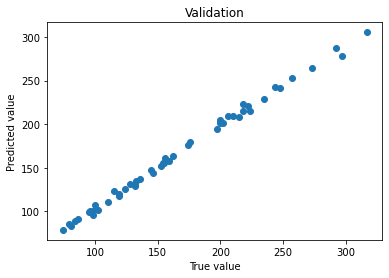

Epoch:  56
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.768531214594841
MAE:  5.429343554687501
MSE:  48.904627841854726


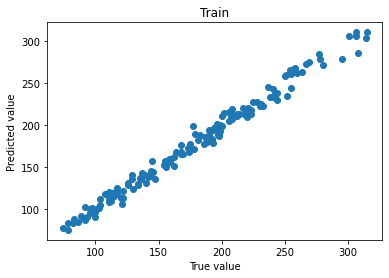

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9603736186027527
MAE:  9.21969052734375
MSE:  118.71219947688627


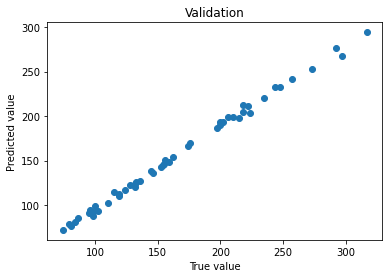

Epoch:  57
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.7465854612986247
MAE:  5.952294563802083
MSE:  54.68115121882837


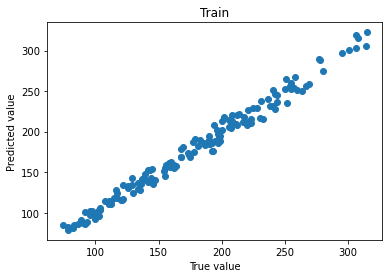

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9224338674545288
MAE:  5.869342285156248
MSE:  43.60179785693023


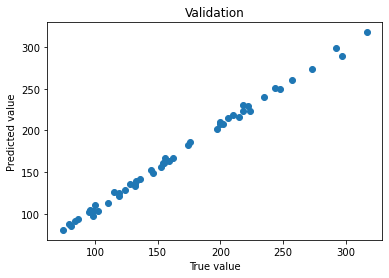

Epoch:  58
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.7532777748505275
MAE:  5.099789095052084
MSE:  40.83331567160558


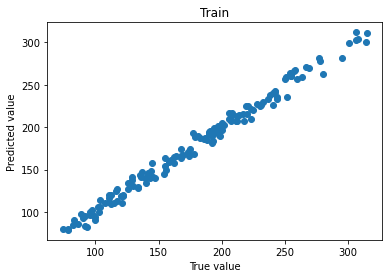

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8683264714479446
MAE:  3.2232407226562496
MSE:  18.78156097473


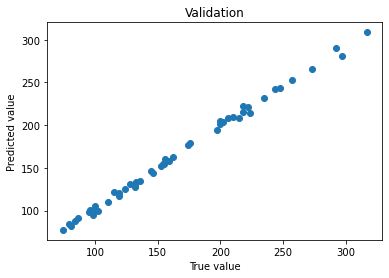

Epoch:  59
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.743423779408137
MAE:  5.8443955729166674
MSE:  52.01171184494941


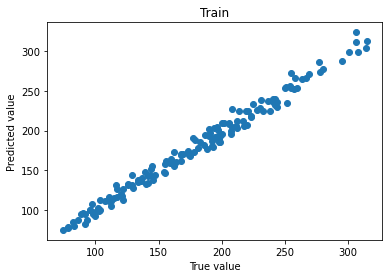

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8777267587184906
MAE:  3.3138224609374993
MSE:  20.586015080191604


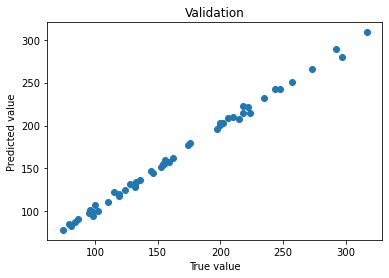

Epoch:  60
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.7237002460161844
MAE:  4.602190787760417
MSE:  32.15126594119914


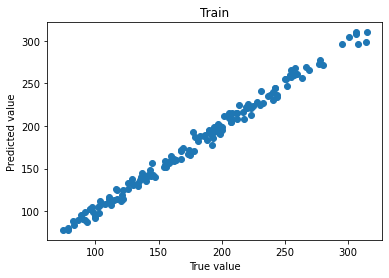

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8146899020671845
MAE:  5.3133608398437495
MSE:  49.85136832824946


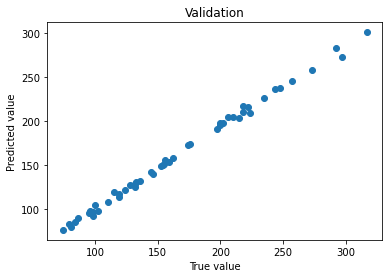

Epoch:  61
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.722486268679301
MAE:  4.377750162760417
MSE:  32.91065568320863


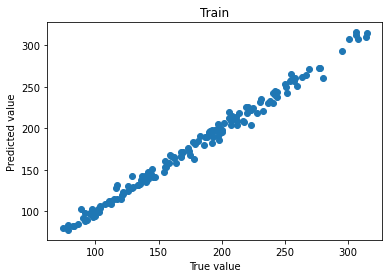

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.882969588637352
MAE:  3.6894416015625007
MSE:  21.612870363371844


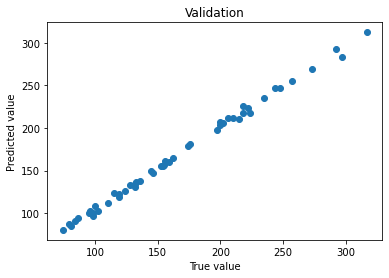

Epoch:  62
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.7085130421320597
MAE:  4.176911946614584
MSE:  26.49255258714501


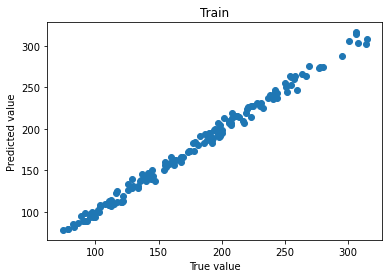

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.854362678527832
MAE:  3.3028500976562487
MSE:  19.170733084110726


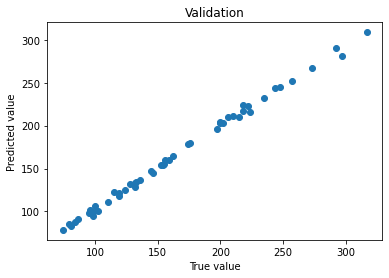

Epoch:  63
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.685596242149671
MAE:  3.990786979166667
MSE:  24.783213618314093


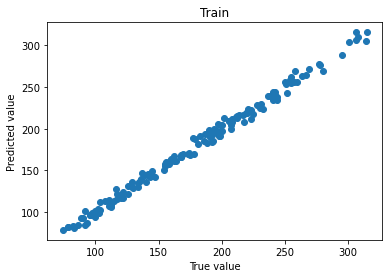

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9190951585769653
MAE:  2.7094350585937512
MSE:  13.64730999594737


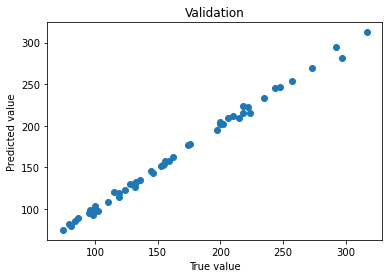

Epoch:  64
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6796065535147985
MAE:  3.9191357747395825
MSE:  24.911684102399658


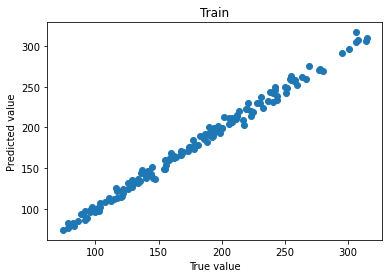

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.866633967757225
MAE:  2.655637695312498
MSE:  12.761832789614669


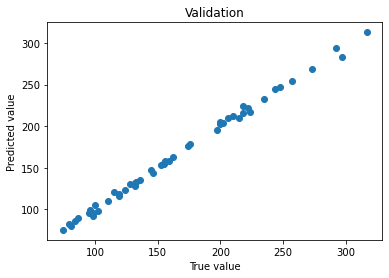

Epoch:  65
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6864841240644455
MAE:  4.080307454427084
MSE:  26.335035783556776


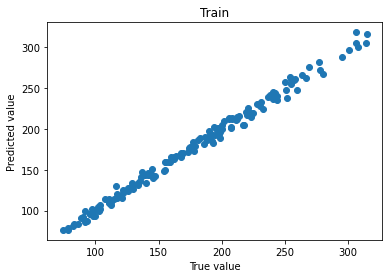

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.965013776421547
MAE:  3.228850097656249
MSE:  21.699853160887248


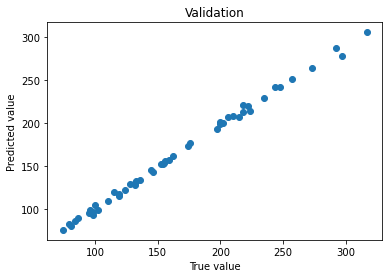

Epoch:  66
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6616282522678375
MAE:  3.946816699218751
MSE:  23.695993389468683


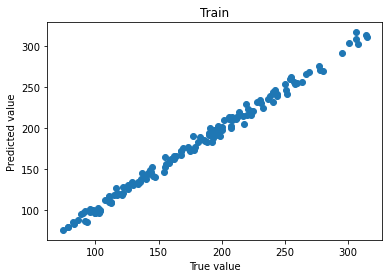

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9423129761219025
MAE:  3.97077041015625
MSE:  28.172173316500174


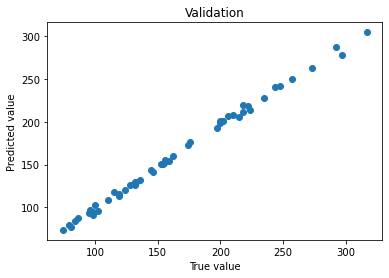

Epoch:  67
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.672304525176684
MAE:  3.445211263020833
MSE:  20.242872169619876


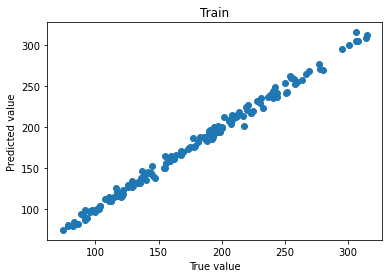

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8991519141197205
MAE:  3.00603037109375
MSE:  18.113590224781525


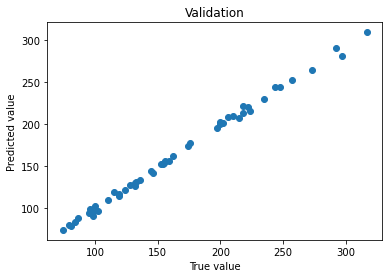

Epoch:  68
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6673282100756963
MAE:  3.3859962239583337
MSE:  19.659513532778103


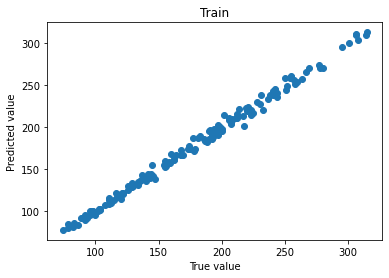

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9017218822240829
MAE:  3.7135556640625014
MSE:  23.1287206677227


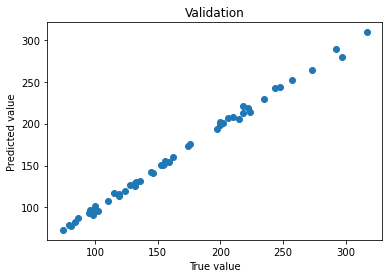

Epoch:  69
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6575094396869342
MAE:  3.3065680013020833
MSE:  17.482688430005545


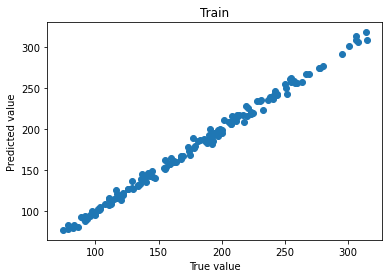

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9611416798830033
MAE:  3.3153785156249977
MSE:  19.875781765171013


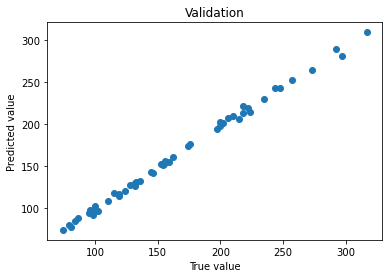

Epoch:  70
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6824466264247895
MAE:  3.2191989257812494
MSE:  17.13743602566544


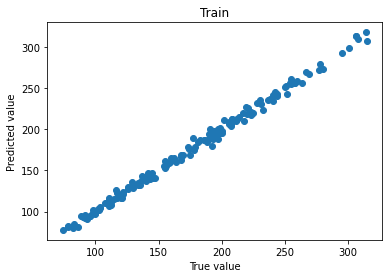

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9173312276601792
MAE:  2.790568847656252
MSE:  14.168412126786713


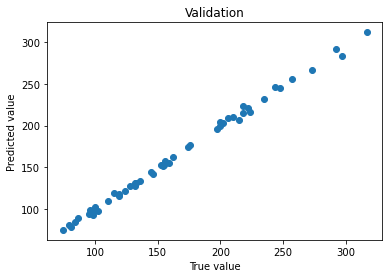

Epoch:  71
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6697310304641724
MAE:  3.098975976562499
MSE:  16.05664318493842


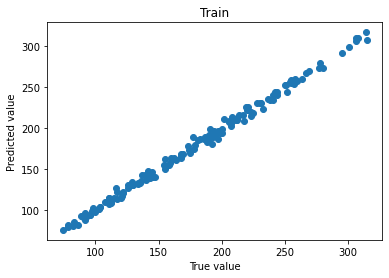

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.926481015086174
MAE:  2.612173828124998
MSE:  12.206783141350732


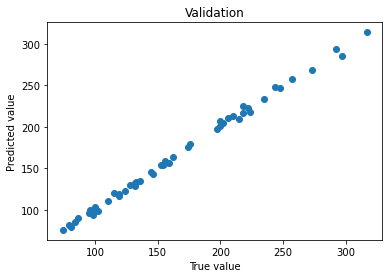

Epoch:  72
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6503806082407634
MAE:  3.1079813476562514
MSE:  15.526899361333378


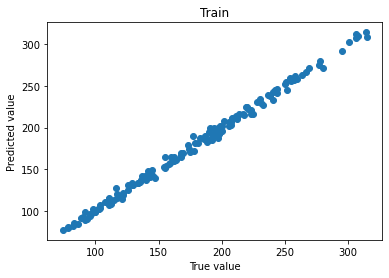

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9317784190177918
MAE:  2.68830810546875
MSE:  12.507425601822371


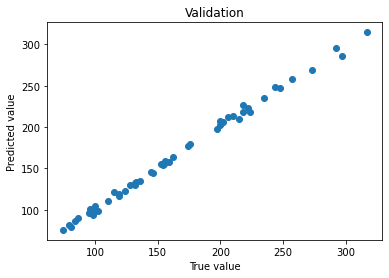

Epoch:  73
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6560607924064
MAE:  2.9278282226562498
MSE:  13.296379583009879


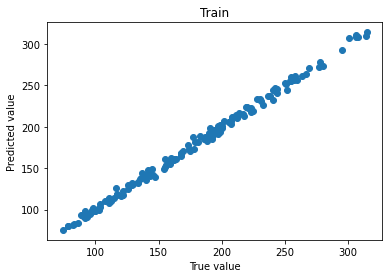

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9144778901338577
MAE:  2.6305023437500017
MSE:  12.42313900896837


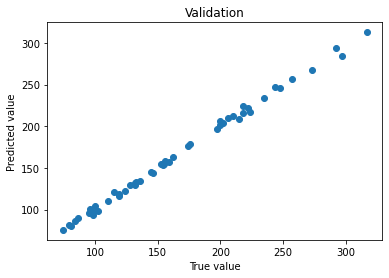

Epoch:  74
Training: 


<ipython-input-23-f961c449aa0a>:24: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model_nas.parameters(), 5)



Mean Loss:  0.6559671159585317
MAE:  2.8401078776041664
MSE:  13.66268664436245


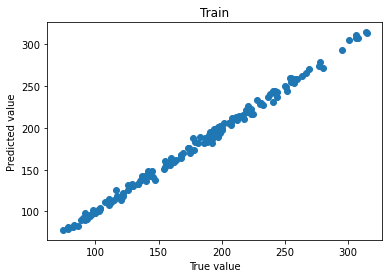

Validation: 


<ipython-input-23-f961c449aa0a>:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-23-f961c449aa0a>:55: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9138239216804505
MAE:  2.6294998046874993
MSE:  12.413454364915856


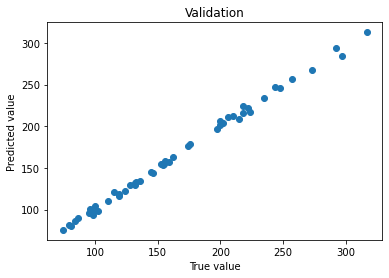

In [25]:
epochs = 75

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_nas, float(epochs))

for epoch in range(epochs):
    
    print("Epoch: ", epoch)
    
    train_nas(train_queue, model_nas, criterion_nas, optimizer_nas)
    validate_nas(valid_queue, model_nas, criterion_nas)
    
    scheduler.step()